# ARMA Modelling with Arbitrary/Non-Consecutive Lags and Exogenous Variables in Python using Sympy: From Matrix Mathematics and Statistics to Parallel Computing

## Contents

* [Setting up Sympy Variables, Matrices and First Order Conditions (FOCs)](#settingupsympyvariablesmatricesandfirstorderconditions)
* [Setting up Conditions on which our Log Likelihood Conditions lie](#part1p2settingupconditionsonwhichourloglikelihoodconditionslie)
    * [Step 1: Compute our ‘max(p,q)+p’th Error Term](#step1computeourmaxpqptherrorterm)
        * [In Scalar Terms](#step1computeourmaxpqptherrorterminscalarterms)
            * [Example 1.scalar: ARMA(1,1) with constant: Step 1](#example1scalararma11withconstantstep1)
        * [In Matrix Terms](#step1computeourmaxpqptherrorterminmatrixterms)
            * [Example 2.matrix: ARMA(2,2) with constant: Step 1](#example2matrixarma22withconstantstep1)
    * [Stationarity](#stationarity)
    * [Invertibility](#importantnote)
    * [Step 2: Compute ‘max(p,q)+p+1’th error term](#step2computemaxpqp1therrorterm)
        * [In Scalar Terms](#step2computemaxpqp1therrorterminscalarterms)
            * [Example 1.scalar: ARMA(1,1) with constant: Step 2](#example1scalararma11withconstantstep2)
        * [In Matrix Terms](#step2computemaxpqp1therrorterminmatrixterms)
            * [Example 2.matrix: ARMA(2,2) with constant: Step 2](#example2matrixarma22withconstantstep2)
    * [Step 3: Compute ‘max(p,q)+p+2’th error term onwards](#computemaxpqp2therrortermonwards)
        * [In Scalar Terms](#computemaxpqp2therrortermonwardsinscalarterms)
        * [In Matrix Terms](#computemaxpqp2therrortermonwardsinmatrixterms)
            * [Example 2.matrix: ARMA(2,2) with constant: Step 3](#example2matrixarma22withconstantstep3)
* [Generalising](#generalising)
    * [Step 1: SPX_Y](#generalisingstep1spxy)
    * [Step 2: Generalised Python workflow](#generalisingstep2generalisedpythonworkflow)
    * [Step 2.1: coding for the ARMA model](#generalisingstep2p1codingforthearmap0)
    * [Ex-Ante Parameter Identification: Autocorrelation and Partial Autocorrelation Functions](#exanteparameteridentification)
    * [Step 2.2: coding for the ARMA model with arbitrary lags](#generalisingstep2p1codingforthearmamodelwithsingulararbitrarylags)


This article addresses constructs a [Python function](https://www.w3schools.com/python/python_functions.asp) allowing anyone to discern all [Maximum Likelyhood Estimates](https://daniellecarusi.files.wordpress.com/2009/07/s6946.pdf) of any ARMA(p,q) model without using [matrices](https://en.wikipedia.org/wiki/Matrix_(mathematics)), using the Python library '[Sympy](https://www.sympy.org/en/index.html)'. This article is aimed at undergraduates, it therefore goes through the fundamental theories of ARMA modelling, stationarity, Taylor's expansion, maximum likelihood estimation and more. The function created a the end of this article is - however - aimed to be used by whomever it may be useful to, undergraduate or otherwise.

## ARMA models

An AutoRegressive Moving Average model of order $p$ and $q$ (ARMA($p,q$)) represents $y_t$ in terms of $p$ of its own lags and $q$ lags of a white noise process such that:

$$\begin{align}
    y_t &= c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + ... + \psi_q \epsilon_{t-q} \\
    y_t &= c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)  \\
    y_t - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) &= c + \epsilon_t + \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \\
    y_t - \phi_1 y_{t-1} - \phi_2 y_{t-2} - ... - \phi_p y_{t-p} &= c + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + ... + \psi_q \epsilon_{t-q} \\
    y_t \left( 1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^{p} \right) &= c + \epsilon_t \left( 1 + \psi_1 L^1 + \psi_2 L^2 + ... + \psi_q L^{q} \right) \\
    \label{eq:ARMApq} \tag{1} y_t \left( 1 - \sum_{i=1}^{p}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 + \sum_{j=1}^{q} \psi_j L^{j} \right)
\end{align}$$

where $L$ is the Lag opperator such that $x_t L^i = x_{t-i} $ $ \forall $  $ x, t, i \in \mathbb{R}$.


It is important to note that due to the fact that we use $p$ autoregressive and $q$ moving average componants, we use $p$ lags of our dependent variable - $y$ - and $q$ lags of our error term - $\epsilon$. This means that the first forecast produced by an ARMA($p,q$) model must use at least $max(p,q)$ lags and we thus loose these observations from our observation data-set.


> $\textbf{Example:}$ Let $p = 2$ and $q = 3$, then
> 
> $$\begin{align}
    y_t &= c + \left( \sum_{i=1}^{2}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{3} \psi_j \epsilon_{t-j} \right) \\
    y_t - \left( \sum_{i=1}^{2}\phi_i y_{t-i} \right) &= c + \epsilon_t + \sum_{j=1}^{3} \psi_j \epsilon_{t-j} \\
    y_t - \phi_1 y_{t-1} - \phi_2 y_{t-2} &= c + \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + \psi_q \epsilon_{t-3} \\
    y_t \left( 1 - \phi_1 L^1 - \phi_2 L^2 \right) &= c + \epsilon_t \left( 1 + \psi_1 L^1 + \psi_2 L^2 \psi_q L^{3} \right) \\
    y_t \left( 1 - \sum_{i=1}^{2}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 - \sum_{j=1}^{3} \psi_j L^{j} \right)
\end{align}$$


### ARMA models' Stationarity

Now we can see that \eqref{eq:ARMApq} can be re-written such that

$$\begin{align}
    y_t \left( 1 - \sum_{i=1}^{p}\phi_i L^{i} \right) &= c + \epsilon_t \left( 1 + \sum_{j=1}^{q} \psi_j L^{j} \right) \\
    y_t \Phi_p(L) &= c + \epsilon_t \Psi_q(L)
\end{align}$$

where the AR (AutoRegressive) component of our model is encapsulated in $\Phi_p(z) \equiv (1 - \sum_{i=1}^{p}\phi_i z^{i})$ and the MA (Moving Average)'s in $\Psi_q(z) \equiv (1 + \sum_{j=1}^{q} \psi_j z^{j})$  $\forall p,q,z \in \mathbb{R}$. From there, we can see that

$$\begin{align}
    y_t &= \frac{c + \epsilon_t \Psi_q(L)}{\Phi_p(L)} \\
    y_t &= \frac{c}{\Phi_p(L)} + \frac{\epsilon_t \Psi_q(L)}{\Phi_p(L)}
\end{align}$$

$c$ is just an arbitrary constant, so we can use an arbitrary $c_{_{\Psi}}$ for $\frac{c}{\Psi_q(L)}$ such that:

$$\begin{align}
    y_t &= c_{_{\Psi}} + \epsilon_t \frac{\Psi_q(L)}{\Phi_p(L)} \\
    &= c_{_{\Psi}} + \epsilon_t \Psi_q(L) \frac{1}{\Phi_p(L)} \\
    &= c_{_{\Psi}} + \epsilon_t \Psi_q(L) \frac{1}{1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^p}
\end{align}$$

$\\ $

> #### N.B.: Taylor's expansion
> 
> By Tylor's expansion, $\frac{1}{1 - x} = \sum_{n=0}^{∞}{x^n}$, thus $\frac{1}{1 - x} \rightarrow ∞ \text{ if } \begin{Bmatrix} x > 1 & \text{if } x \in \mathbb{R} \\ x \text{ lies outside the unit circle } & \text{if } x \in \mathbb{Z} \end{Bmatrix}$.
> 
> $\textbf{Example 1:}$ The last equality only applies thanks to Taylor's expansion:
> $$\begin{equation}
    \frac{1}{\Phi_1(L)} = \frac{1}{1 - \phi_1 L^1} = \sum_{n=0}^{∞}{(\phi_1 L)^n}
\end{equation}$$
> 
> $\textbf{Example 2:}$ The last equality only applies thanks to Taylor's expansion:
> $$\begin{equation}
     \frac{1}{\Phi_p(L)} = \frac{1}{1 - \phi_1 L^1 - \phi_2 L^2 - ... - \phi_p L^p} = \frac{1}{1 - (\phi_1 L^1 + \phi_2 L^2 + ... + \phi_p L^p)} = \sum_{n=0}^{∞}{(\phi_1 L^1 + \phi_2 L^2 + ... + \phi_p L^p)^n}
\end{equation}$$
> similarly to how
> $$\begin{equation}
     \frac{1}{\Phi_p(L)} = \frac{1}{1 - \sum_{i=1}^{p}\phi_i L^{i}} = \sum_{n=0}^{∞}{\left(\sum_{i=1}^{p}\phi_i L^{i} \right)^n}
 \end{equation}$$
> 
> Thus, $\forall (\sum_{i=1}^{p}\phi_i L^{i})$ lying outside the unit circle, we end up with $\frac{1}{\Phi_p(L)} \rightarrow ∞$; *i.e.*:

$ \\ $

<ins> An AR process is called **stationary** if the roots of its equation $ \Phi_p(z)$ ( denoted with a star: $z^*$ ) lie outside the unit circle </ins>


In practice, an ARMA($p$, $q$) model (${y_t \Phi_p(L) = c + \epsilon_t \Psi_q(L)}$) is stationary if its AR part ($\Phi_p(L)$) is stationary, which itself only occurs if its roots lie outside the unit circle (i.e.: ${|z^*| > 1}$). More explicitly, for $\Phi_p(z)$:

$$\begin{align}
    \Phi_p(z) &= 0 \\
    1 - (\phi_1 z^1 + \phi_2 z^2 + ... + \phi_p z^p) &= 0 \\
    \label{eq:roots}\phi_1 z^1 + \phi_2 z^2 + ... + \phi_p z^p &= 1 \tag{2}
\end{align}$$

The z value abiding by \eqref{eq:roots} are its roots, ${|z^*|}$, and there often are more than one. As long as they are all greater than one, then the process is stationary.

> $\textbf{Example:}$ For AR(1) processes, (i.e.: when $p = 1$)
> $$\begin{align}
    \Phi_1(z) &= 0 \\
    1 - \phi_1 z^1 &= 0 \\
    \phi_1 z &= 1 \\
    z &= \frac{1}{\phi_1} \\
\end{align}$$
> 
> Then the modulus is simply the absolute value; and so ${|z^*| > 1}$ if ${\phi_1 < 1}$, by extention: when $\sum_{i=1}^{p}\phi_i L^{i}$ is lying inside the unit circle, $\frac{1}{\Phi_p(L)}$ is finite (or, with notational abuse: $\frac{1}{\Phi_p(L)} < ∞$).

$$ \ $$
### Generic ARMA(p,q) model Estimation

#### Method of parameter estimation

In this study, we will use the Maximum Likelihood method of estimation of our unknown parameters.

The log likelihood function of independantly and identically distributed $y$ variables is defined as $L_T(\Theta) \equiv \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.$ It is often normalised (without loss of information or generalisation) by $T$ such that $L_T(\Theta) \equiv \frac{1}{T} \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.$

#### Likelyhood function with normally, identically and independently distributed independent-variables and only with known parameters $\Theta = $[${\mu, \sigma^2}$]

Asumming independently and normaly distributed independent variables {$y_t$}$^T_1$, i.e.: assuming that ${y_t \stackrel{iid}{\sim} N \left( \mu, \sigma^2 \right)}$, then - with known parameters $\Theta = $[${\mu, \sigma^2}$]:

$$\begin{array}{ll}
    f(y_t;\Theta) = \frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]
        &
        & \text{where $exp[\cdot] \equiv e^{[\cdot]}$, since ${y_t \sim N(\mu, \sigma^2)}$}, \\
    \prod_{t=1}^T{f(y_t|y_1;\Theta)} = \prod_{t=1}^T{f(y_t|y_{t-1}, y_{t-2}, ... , y_{1}; \Theta) } = \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]}
        &
        & \text{due to the independance in $y_t$'s distributions ${ \left( \text{i.e.: }  y_t \stackrel{\textbf{iid}}{\sim} N(\mu, \sigma^2) \right) }$,} \\
    L_T(\Theta) = \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]}
        &
        & \text{since the likelihood function is } L_T(\Theta) \equiv \prod_{t=1}^T{f(y_t|y_{1}, y_{2}, ... , y_{t}; \Theta)}.
\end{array}$$

Then, we define the log-likelihood functin as ${ln[ L_T(\Theta) ]}$ such that:
$$\begin{align}
    ln[ L_T(\Theta) ] \equiv ln[ f(y_T|y_{T-1}, y_{T-2}, ... , y_{1}; \Theta) ] &= ln \left( \prod_{t=1}^T{\frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right]} \right) \\
    &= ln \left[ \prod_{t=1}^T{f(y_t;\Theta)} \right] \\
    &= \sum_{t=1}^T{ln [ f(y_t;\Theta) ] } \\
\end{align}$$

Without loss of generality, and to take an individualistic aproach - normalising by $T$, we can write

$$\begin{align}
    ln[ L_T(\Theta) ] &= \frac{1}{T} \sum_{t=1}^T{ln [ f(y_t;\Theta) ] } \\
    &= \frac{1}{T} \sum_{t=1}^T{ln \left( \frac{1}{\sqrt[2]{2 \pi \sigma^2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right] \right) } \\
    &= \frac{1}{T} \sum_{t=1}^T{ln \left( \left[2 \pi \sigma^2 \right]^{ - \frac{1}{2}} exp \left[ -\frac{(y_t - \mu)^2}{2 \sigma^2} \right] \right) } \\
    &= \frac{1}{T} \sum_{t=1}^T{ \left[ - \frac{1}{2} ln(2 \pi) - \frac{1}{2} ln \left( \sigma^2 \right) - \frac{(y_t - \mu)^2}{2 \sigma^2} \right]} \\
    &= - \frac{1}{2} ln(2 \pi) - \frac{1}{2} ln \left( \sigma^2 \right) - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2} \\
\end{align}$$

$ \\ $
#### With unknown parameters

We may have situations where we do not know all the parameters in $\Theta$ (which, as a reminder, previously was [${\mu, \sigma^2}$]). Then, we may estimate it as:

$
\begin{equation}
    { \hat{\Theta} = \stackrel{\Theta}{arg max} ln[L_T(\Theta)]}.
\end{equation}
$

There, the notation $\stackrel{x}{arg max} f(x)$ denotes 'the value of $x$ maximising the function $f(x)$', *i.e.*: $\hat{\Theta} = \stackrel{\Theta}{arg max}[f(\Theta)]$ denotes 'the value of $\Theta$ maximising the function $f(\Theta)$'.

$ \\ $

#### With normally, identically and independently distributed independent-variables and unknown ARMA parameters (i.e.: $\Theta = $[${c, \phi_1, ... , \phi_p, \psi_1, ... , \psi_q, \sigma^2}$])


The assumption of 'normally, identically and independently distributed independent-variables' translates to: $ \epsilon_t \stackrel{\textbf{iid}}{\sim} N \left( 0, \sigma^2 \right) $, which itself implies that $ \epsilon_{t \vert t-1} \sim N \left( 0, \sigma^2 \right) $


We may define our (fixed but) unknown parameters as $\Theta = \left[ {c, \phi_1, ... , \phi_p, \psi_1, ... , \psi_q, \sigma^2}\right]$ and estimate them as $\hat{\Theta} = \left[ {\hat{c}, \hat{\phi_1}, ... , \hat{\phi_p}, \hat{\psi_1}, ... , \hat{\psi_q}, \hat{\sigma^2}} \right]$:



$$\begin{array}{ll}
    \hat{\Theta}
    &
    = \stackrel{\Theta}{arg max} ln[L_T(\Theta)]
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
                - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2}
        \right]
    &
    \text{since } ln[L_T(\Theta)] =
        \left[
            - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t - \mu)^2}
        \right]
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ (y_t -
                    \mathbb{E} \left( y_t \vert y_{t-1} \right)
                )^2}
        \right]
    & {\text{since $\mu = \mathbb{E} \left( y_t \vert y_{t-1} \right)$ and where $ \vert $ is the standard notation for 'knowing'} \\ \text{Here we only look at conditional Likelihood.}}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                        y_t - \mathbb{E} \left[
                            c + \left(
                                \sum_{i=1}^{p}\phi_i y_{t-i}
                                \right) \\
                            + \epsilon_t + \left(
                                \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                            \right)
                        \vert y_{t-1} \right]
                \right)^2
            }
        \right]
    & \text{since } y_t = c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                        y_t - \left[
                            \mathbb{E}(c \vert y_{t-1} ) + \left(
                                \sum_{i=1}^{p} \mathbb{E}( \phi_i y_{t-i} \vert y_{t-1})
                            \right) \\ + \mathbb{E}(\epsilon_t \vert y_{t-1} ) + \left(
                                \sum_{j=1}^{q} \mathbb{E} (\psi_j \epsilon_{t-j} \vert y_{t-1} )
                            \right)
                        \right]
                \right)^2
            }
        \right]
    & \text{since the Expectation of summs is the sum of Expectations}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    y_t -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right) \\
                    + \mathbb{E}(\epsilon_t \vert y_{t-1} ) + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since only } \epsilon_t \text{ is random in } y_t \text{ (knowing } y_{t-1}\text{)}
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    y_t -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right) \\
                    + 0 + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since } \mathbb{E}(\epsilon_t \vert y_{t-1} ) = \mathbb{E}(\epsilon_{t \vert t-1} ) = 0 \text{, since } \epsilon_t \sim N \left( 0, \sigma^2 \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
                \left(
                    c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\ -  c + \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right)
                    + \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                \right)^2
            }
        \right]
    & \text{since } y_t = c + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)+ \epsilon_t + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)
    \\
    &
    = \stackrel{\Theta}{arg max}
        \left[
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{\epsilon_t^2
            }
        \right]
    & \text{rearanging}
\end{array}$$

Thus:

$$
\begin{array}{ll}
\hat{\Theta} &= \stackrel{\Theta}{arg max}
        \begin{Bmatrix}
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left(
                    {\left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]}^2
                \right)}
        \end{Bmatrix} \\
\hat{\Theta} &= \stackrel{\Theta}{arg max}
        \begin{Bmatrix}
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left(
                    \left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]
                    \left[ y_t - c - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \right]
                \right)}
        \end{Bmatrix} \\ \\
&= \stackrel{\Theta}{arg max}
        \begin{Bmatrix}
            - \frac{
                ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ \left[
                {y_t}^2 - y_t c - y_t \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) - y_t \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - c y_t + c^2 + c \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) + c \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) {y_t} + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) c +  {\left( \sum_{i=1}^{p}\phi_i y_{t-i} \right)}^2 + \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \\
                - \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) {y_t} + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) c + \left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right) \left( \sum_{i=1}^{p}\phi_i y_{t-i} \right) + {\left( \sum_{j=1}^{q} \psi_j \epsilon_{t-j} \right)}^2 \right] }
        \end{Bmatrix} \\ \\
&= \stackrel{\Theta}{arg max}
    \begin{Bmatrix}
        - \frac{ln(2 \pi)}{2}
        - \frac{ln \left( \sigma^2 \right)}{2}
        - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
            \left[ {y_t}^2 - 2 y_t c
                - 2 y_t \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                - 2 y_t \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + c^2
                + 2 c \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                + 2 c \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + {
                    \left(
                        \sum_{i=1}^{p}\phi_i y_{t-i}
                    \right)
                }^2
                + 2 \left(
                    \sum_{i=1}^{p}\phi_i y_{t-i}
                \right)
                \left(
                    \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                \right) \\
                + {
                    \left(
                        \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
                    \right)
                }^2
            \right]
        }
    \end{Bmatrix}
\end{array}
$$

$ \\ $

> N.B.: The **Chain Rule** states that:
> 
> if $f$ and $g$ are both differntiatable and $F(x)$ is the composite funcition defined by $F(x) = f(g(x))$, then $F$ is diferentiatable and its 1st derivative (i.e.: $F'$) is given by the product:
> 
> $$ F'(x) = f'(g(x))g'(x) $$

To maximise $- \frac{ln(2 \pi)}{2} - \frac{ln \left( \sigma^2 \right)}{2} - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{\epsilon_t^2}$  with respect to $\Theta$, we differentiate with respect to $\Theta$ and equate it to $0$, this is known as **First Order Condition** maximisation; thus:

$ \\ $
##### First Order Condition with Respect to $c$

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta c} &=
- \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[
        - 2 y_t + 2 c
        + 2 \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + 2 \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{ 2
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&=
- \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[
        - y_t + c
        + \left(
            \sum_{i=1}^{p}\phi_i y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta c} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{c}} = 0$, and:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{c}} = 0 &=
- \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[
        - y_t + \widehat{c}
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \\
&=
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t + \widehat{c}
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \text{multiplying both sides by } \widehat{\sigma^2} \\
&= - \frac{T \widehat{c}}{T}
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \\
&= - \widehat{c}
- \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

then:

$$
\begin{array}{ll}
\widehat{c} &= - \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\phi_i$

The notation here might seem a litle confusing, but it is actually ergonomic. We are going to investigate the $ln[L_T(\Theta)]$ function with respect to any one $\phi_i$ for any applicable $i$. The bellow is thus for any one applicable $i$:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \phi_i}
&= - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- 2 y_t y_{t-i}
        + 2 c y_{t-i}
        + 2 {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + 2  y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&= - \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + c y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
} \\
&= - \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + c y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p}\phi_k y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \psi_j \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \phi_i} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \phi_i} = 0$, and (again, for any applicable $i$) :

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\phi_i}} = 0 &= - \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + \widehat{c} y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} \\
&= \sum_{t=1}^T{
    \left[- y_t y_{t-i}
        + \widehat{c} y_{t-i}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        } y_{t-i}
        + y_{t-i} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} \\
&= \sum_{t=1}^T{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\psi_j$

The notation here might seem a litle confusing, but it is actually ergonomic. We are going to investigate the $ln[L_T(\Theta)]$ function with respect to any one $\psi_j$ for any applicable $j$. The bellow is thus for any one applicable $j$:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \psi_j}
&= - \frac{1}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- 2 y_t \epsilon_{t-j}
        + 2 c \epsilon_{t-j}
        + 2 {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + 2 \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= - \frac{2}{2 \sigma^2 T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + c \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= - \frac{1}{\sigma^2 T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + c \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p}\phi_i y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \psi_k \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
}
\end{array}
$$

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \psi_j} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \psi_j} = 0$, and (again, for any applicable $j$) :

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\psi_j}} = 0 &= - \frac{1}{\widehat{\sigma^2} T} \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + \widehat{c} \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= \sum_{t=1}^T{
    \left[- y_t \epsilon_{t-j}
        + \widehat{c} \epsilon_{t-j}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        } \epsilon_{t-j}
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right) \epsilon_{t-j}
    \right]
} \\
&= \sum_{t=1}^T{ \epsilon_{t-j}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right)
    \right]
}
\end{array}
$$

$ \\ $
##### First Order Condition with Respect to $\sigma^2$

Letting

$$
S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j}) = 
\sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c}
        - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + \widehat{c}^2
        + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2
        + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
}
$$

then:

$$
\begin{array}{ll}
\frac{\delta ln[L_T(\Theta)]}{\delta \sigma^2}
&= - \frac{1}{2 \sigma^2} + \frac{1}{2 {\left( \sigma^2 \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$$

Note that the $+$ in $+ \frac{1}{2 {\left( \sigma^2 \right)}^2 T}$ comes from the differential of $- \frac{1}{2 \sigma^2 T}$, *i.e.*: of $- \frac{(\sigma^2)^{-1}}{2 T}$ 

by **FOC**, $\Theta = \widehat{\Theta}$ when $\frac{\delta ln[L_T(\Theta)]}{\delta \sigma^2} = 0$, therefore $\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \sigma^2} = 0$, and:

$
\begin{array}{ll}
\frac{\delta ln[L_T(\widehat{\Theta})]}{\delta \widehat{\sigma^2}} = 0
&= - \frac{1}{2 \widehat{\sigma^2}} + \frac{1}{2 {\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$

Thus:

$
\begin{array}{ll}
\frac{1}{2 \widehat{\sigma^2}}
&= \frac{1}{2 {\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array}
$

then:

$
\begin{array}{ll}
\frac{1}{\widehat{\sigma^2}} &= \frac{1}{{\left( \widehat{\sigma^2} \right)}^2 T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j})
\end{array} $

then:

$$
\begin{array}{ll}
\widehat{\sigma^2} &= \frac{1}{T} S(\widehat{c}, \widehat{\phi_i}, \widehat{\psi_j}) \\
&= \frac{1}{T} \sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c} - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + \widehat{c}^2 + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2 + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\ + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
} \\
\end{array}
$$

$ \\ $
##### First Order Conditions
Resuming; our FOC equations produced:

$$
\begin{equation}
\widehat{c} = - \frac{1}{T} \sum_{t=1}^T{
    \left[
        - y_t
        + \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
\end{equation}
$$

$$ \\ $$

$$\begin{align}
0 = \sum_{t=1}^T{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
}
& \text{   for all } i \leq p
\end{align}$$

$$ \\ $$

$$\begin{align}
0 = \sum_{t=1}^T{ \epsilon_{t-j}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }
        + \left(
            \sum_{k=1}^{q} \widehat{\psi_k} \epsilon_{t-k}
        \right)
    \right]
}
& \text{   for all } j \leq q
\end{align}$$

$$ \\ $$

$$
\begin{equation}
\widehat{\sigma^2} = \frac{1}{T} \sum_{t=1}^T {
    \left[
        {y_t}^2 - 2 y_t \widehat{c} - 2 y_t \left(
        \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) - 2 y_t \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + \widehat{c}^2 + 2 \widehat{c} \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) + 2 \widehat{c} \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
            \left(
                \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
            \right)
        }^2
        + 2 \left(
            \sum_{i=1}^{p} \widehat{\phi_i} y_{t-i}
        \right) \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right) \\
        + {
        \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
        }^2
    \right]
} \\
\end{equation}
$$

From there one can only compute the parameters numerically. It does not look like it due to the large amounts of substitutions that would be required but these FOC equations offer a closed system solvable itteratively from the data we have. Remember that the data we have consist of $y_t, y_{t-1}, ... , y_1, \epsilon_{t-1}, \epsilon_{t-2}, ..., \epsilon_{1}$, *i.e.*: everything without a hat. This is where [Sympy](https://docs.sympy.org/latest/index.html) comes in; it allows us to programatically returnMLE estimates for all estimates of any such ARMA model as shown above:

## Setting up Sympy Variables, Matrices and First Order Conditions (FOCs) <a class="anchor" id="settingupsympyvariablesmatricesandfirstorderconditions"></a>

First we need to import our primary libraries:

In [23]:
import sys
print("This code is running on Python version: " + sys.version)

This code is running on Python version: 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 22:45:29) [MSC v.1916 32 bit (Intel)]


In [24]:
import sympy
print("The Sympy library imported in this code is version: " + sympy.__version__)

The Sympy library imported in this code is version: 1.6.2


Remember that we have to set our mathematical model's arguments ($p$, $q$ and $c$). From our data, we also need to extrapalate $T$ - the number of variables in our regressand matrix $Y$.

In [25]:
# Setting up our innitial arguments:
p, q, c, T, symb_func_list = 1, 1, True, 6, []

if c is True:
    _c = 1

# This is how we create Sympy variables:
t, sigma_s = sympy.symbols("t, \hat{\sigma}^2")

Now let's create our $T$x1 regressand matrix, $Y$:

In [26]:
Y = sympy.MatrixSymbol('Y', T-max(p, q)-1, 1)
Y.shape

(4, 1)

Lets evaluate our $Y$ matrix, call it ' Ytm ' - the matrix full of our regressands ($y_{t-i}$), it is called such as it stands for '<ins>Y</ins> for <ins>t</ins> <ins>m</ins>inus' i for each i

In [27]:
Ytm = sympy.Matrix([sympy.Symbol('y_{t-' + str(_t) + '}')
                    for _t in range(T - max(p, q) - 1)])
Ytm

Matrix([
[y_{t-0}],
[y_{t-1}],
[y_{t-2}],
[y_{t-3}]])

Now let's see our $\left[T - max(p,q)\right]$ x $k$ regressor matrix, $X$, where $k = \begin{Bmatrix} p + q & \text{if the model has no constant, c} \\ p + q + 1 & \text{if the model has a constant, c} \end{Bmatrix}$ :

In [28]:
X = sympy.MatrixSymbol('X', T-max(p, q)-1, p+q+c)
X.shape

(4, 3)

Let's evaluate $X$ and name the resulting matrix simillarly to its $Y$ counterpart:

In [29]:
Xtm_list = [[sympy.Symbol('y_{t-' + str(_t - i + p) + '}')
             for _t in range(max(p, q), T-1)] for i in range(p, 0, -1)]
for j in range(q, 0, -1):
    Xtm_list.append([sympy.Symbol('{\epsilon}_{t-' + str(_t - j + q) + '}')
                     for _t in range(max(p, q), T-1)])
Xtm = sympy.Matrix(Xtm_list).T  # ' .T ' transposes the matrix.
if c is True:
    Xtm = Xtm.col_insert(0, sympy.ones(T - max(p, q) - 1, 1))
Xtm

Matrix([
[1, y_{t-1}, {\epsilon}_{t-1}],
[1, y_{t-2}, {\epsilon}_{t-2}],
[1, y_{t-3}, {\epsilon}_{t-3}],
[1, y_{t-4}, {\epsilon}_{t-4}]])

In order to get the inverse of our X'X matrix, its determinant must be non-zero. Let's check our determinant:

In [30]:
(Xtm.T * Xtm).det() == 0

False

Now let's see our $T$x1 stochastic error matrix, $\epsilon$:

In [31]:
Epsilon = sympy.MatrixSymbol('\epsilon', T-max(p,q)-1, 1)
Epsilon.shape

(4, 1)

Now let's see our $k$ x $\left[T - max(p,q)\right]$ regressor matrix, $\beta$, where $k = \begin{Bmatrix} p + q & \text{if the model has no constant, c} \\ p + q + 1 & \text{if the model has a constant, c} \end{Bmatrix}$ :

In [ ]:
Beta = sympy.MatrixSymbol('beta', p+q+c, 1)
Beta.shape

Let's evaluate that $\beta$ matrix with its estimate, $\hat{\beta}$:

In [ ]:
coef_list = [sympy.Symbol('\hat{\phi_' + str(i) + '}') for i in range(1, p+1)]
coef_list.extend([sympy.Symbol('\hat{\psi_' + str(j) + '}') for j in range(1, q+1)])
_Beta_hat = sympy.Matrix([coef_list]).T
if c == True:
    _Beta_hat = _Beta_hat.row_insert(0, sympy.Matrix([sympy.Symbol('\hat{c}')]))
_Beta_hat

Now let's have a look at our matrix of all estimators, $\Omega$:

In [ ]:
Omega = sympy.MatrixSymbol('\Omega', p+q+c+1, 1)

# Let's evaluate it too:
_Omega_hat = _Beta_hat.row_insert(Beta.shape[0], sympy.Matrix([sigma_s]))
_Omega_hat

We now have all the components for our log likelihood equation remember that we are -this far - keeping the $T$ because we did not normalise the log likelihood; but the T is simply a constant and bears no impact on its maximising. Remember - also - that the superscipt $T$ does not stand for 'the poser of $T$', but 'transpose instead; i.e.: $X^T \neq X$ to the power of $T$.

In [ ]:
log_lik = (
    (
        - (T / 2) * sympy.log(2 * sympy.pi) - (T / 2) * sympy.log(sigma_s)
    )*sympy.Identity(1) - (1 / (2 * sigma_s)) * (
        (Y - (X * Beta)).T*(Y - (X * Beta))
    )
)
display(log_lik)

Let's evaluate our log likelihood equation too:

In [ ]:
_log_lik = (
    (
        -(T / 2) * sympy.log(2 * sympy.pi) - (T / 2) * sympy.log(sigma_s)
    )*sympy.Identity(1) - (1 / (2 * sigma_s)) * (
        (Ytm - (Xtm * _Beta_hat)).T * (Ytm - (Xtm * _Beta_hat))
    )
)
display(_log_lik)

As per the above, our FOC $\hat{\beta}$ is $(X' X)^{-1} X'Y$:

In [ ]:
FOC_Beta_hat = (X.T * X).inverse() * X.T * Y
FOC_Beta_hat

We can evaluate it:

In [ ]:
_FOC_Beta_hat = FOC_Beta_hat.subs(Y, Ytm)
_FOC_Beta_hat = _FOC_Beta_hat.subs(X, Xtm)
_FOC_Beta_hat

In [ ]:
_sol_Beta_hat = (Xtm.T * Xtm)**(-1) * Xtm.T * Ytm  # Note that with T < 5, the rank of the X'X matrix is too low and its determinant is 0; thus it would not be invertible. You can verify this with ' (Xtm.T * Xtm).rank() '

In [ ]:
# _sol_Beta_hat

Now let's have a look at our Score matrix:

In [ ]:
Score = log_lik.diff(Omega)
Score

Let's evaluate it too:

In [ ]:
_Score = _log_lik.diff(_Omega_hat)
_Score

From there, we cound rearage to get - for e.g. - $\sigma^2$:

In [ ]:
sympy.solve(_Score[-1][0], sigma_s)[sigma_s]

$$ \\ $$
## Setting up Conditions on which our Log Likelihood Conditions lie <a class="anchor" id="part1p2settingupconditionsonwhichourloglikelihoodconditionslie"></a>

It may seem as though we now that we have our FOCs, we have closed form equations for all our estimates ($\hat{c}, \hat{\phi_1}, \hat{\phi_2}, ... \hat{\phi_p}, \hat{\psi_1}, \hat{\psi_2}, ..., \hat{\psi_q}, \hat{\sigma}$) and we ought to move on to empirical methods (*i.e.*: methods using data).

> Close Form Equations: [In mathematics, a closed-form expression is a mathematical expression expressed using a finite number of standard operations. It may contain constants, variables, certain "well-known" operations, and functions, but usually no limit, differentiation, or integration.](https://en.wikipedia.org/wiki/Closed-form_expression) In our case, if all our estimates were defined in our FOC equations in terms of data points that we have (*i.e.*: that are known), we could say that we have close form FOC equations for them.

However, in a typical situation where we have data for our regressors ($y_t, y_{t-1}, ..., y_1$), we do not know all the terms in our FOC equations; we are missing values for our $\epsilon_t, \epsilon_{t-1}, ..., \epsilon_1$ since $ \epsilon_t \stackrel{\textbf{iid}}{\sim} N \left( 0, \sigma^2 \right)$; *i.e.*: $\epsilon_t$ values are dependent on $\sigma$ that needs to be estimated. To circumvent this issue, we impose a new condition that
$$\epsilon_1 = \epsilon_2 = ... = \epsilon_{max(p,q)+p-1} = 0.$$
*N.B.*: For generality, we will look at the model with a constant, since it can always be $0$ if the optimal model is one without a constant.

Why do we go all the way to $max(p,q)+p-1$ (in $\epsilon_1 = \epsilon_2 = ... = \epsilon_{max(p,q)+p-1} = 0$)? Because we need the 1st $max(p,q)$ observations for the AR component of our model, and we need $p$ FOC equations to compute the $p$ AR estimates. (The $\hat{c}$ and $\hat{\sigma}$ estimates can be computed from the AR ones, so we don't need any more.)

This may seem to be a heavy condition, but it - in fact - becomes less and less disruptive for our computed estimated the larger our data set is (*i.e.*: the larger $t$ or $T$ is). We can split this process in Steps:

### Step 1: Compute $\epsilon_{max(p,q)+p}$ <a class="anchor" id="step1computeourmaxpqptherrorterm"></a>

#### In Scalar Terms <a class="anchor" id="step1computeourmaxpqptherrorterminscalarterms"></a>

Since we need the first $p$ and $q$ values for $y$ for our first modelled $\hat{y}$, we need to start at $\hat{y}_{max(p,q)+1}$ carrying on for $p$ steps (*i.e.*: from $max(p,q)+1$ to $max(p,q)+p$) such that for each $1 \leq i \leq p$:

$$ \label{eq:3} \hat{y}_{max(p,q)+i} = \hat{c} + \left(\sum_{k=1}^{p} \hat{\phi_k} y_{max(p,q)+i-k}\right) + \left( \sum_{j=1}^{q} \hat{\psi_j} \epsilon_{max(p,q)+i-j} \right) \tag{3}$$

and

$$\begin{align}
    y_{max(p,q)+i} &= c + \left(\sum_{k=1}^{p}\phi_k y_{max(p,q)+i-k}\right) + \epsilon_{max(p,q)+i} + \left( \sum_{j=1}^{q} \psi_j \epsilon_{max(p,q)+i-j} \right) \\
\label{eq:4}    &= c + \left( \sum_{k=1}^{p}\phi_k y_{max(p,q)+i-k} \right)+ \epsilon_{max(p,q)+i}  \tag{4}
\end{align}
$$

since $\epsilon_1, \epsilon_2, ..., \epsilon_{max(p,q)+p-1} = 0$. Therefore, the optimal values of $c, \phi_1, \phi_2, ..., \phi_p$ minimising $\epsilon_{max(p,q)+p} = \hat{y}_{max(p,q)+p} - y_{max(p,q)+p}$ are the ones abiding the $p$ FOC equations. Remember that this is the whole point of the FOC equations; they were deducted from our MLE method to compute estimates ($\hat{\Theta}$) that would maximise the likelyness of observing the regressands we have in our data ($Y$), which equates to the estimates reducing our error term ($\epsilon_{max(p,q)+p}$). Letting $m = max(p,q)$, the FOC equations in question are:
$$
\begin{array}{ll}
0 &= \sum_{t=m+1}^{m + p}{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]} \\
&\label{eq:5}= \sum_{t=m+1}^{m + p}{ y_{t-i}
    \left[- y_t
        + \widehat{c}
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \right]} \\ \tag{5}
\end{array}
$$
for each $1 \leq i \leq p$, where 
$$
\begin{array}{ll}
\widehat{c} &= - \frac{1}{m + p} \sum_{t=m+1}^{m + p}{
    \left[
        - y_t
        + \left(
            \sum_{r=1}^{p} \widehat{\phi_r} y_{t-r}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} \\
\label{eq:6} &= - \frac{1}{m + p} \sum_{t=m+1}^{m + p}{
    \left[
        - y_t
        + \left(
            \sum_{r=1}^{p} \widehat{\phi_r} y_{t-r}
        \right)
    \right] \tag{6}
}
\end{array}
$$
This - as per \eqref{eq:5} - equates to - for each $1 \leq i \leq p$:
$$
\begin{array}{ll}
\label{eq:7} 0 &= \sum_{t=m+1}^{m + p}{ y_{t-i}
    \begin{Bmatrix}- y_t
        - \frac{1}{m + p} \left[ \sum_{\tau=m+1}^{m + p}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{p} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}} \tag{7} \\
\end{array}
$$

From equations \eqref{eq:3} to \eqref{eq:7}, the usual $i$ denoting elements related to the AR part of our model was replaced with $k$ and $r$ here to eleviate from possible confusion as to which $i$ is used where, similarly to the substitution of $t$ and $\tau$.
Now that we have our estimate values, we can compute $\hat{y}_{max(p,q)+p} = \hat{c} + \left( \sum_{i=1}^{p}\hat{\phi_i} y_{max(p,q)+p-i} \right)$, from which we can compute $\epsilon_{max(p,q)+p} = \hat{y}_{max(p,q)+p} - y_{max(p,q)+p}$,*i.e*: $$\epsilon_{m+p} = \hat{y}_{m+p} - y_{m+p}$$


> **Example 1.scalar: ARMA(1,1) with constant: Step 1:** <a class="anchor" id="example1scalararma11withconstantstep1"></a>
>
> For an ARMA(1,1) with constant model, $p = 1$ and $q = 1$. Thus, as per the above, we let $\epsilon_1 = \epsilon_2 = ... = \epsilon_{m+p-1} = 0$, which is to say $\epsilon_1 = 0$, and $m = max(p,q) = 1$ such that:
> $$
\begin{array}{ll}
& y_2 &= c + \phi_1 y_1 + \epsilon_2 + \psi_1 \epsilon_1 & \\
& &= c + \phi_1 y_1 + \epsilon_2 & \text{ since } \epsilon_1 = 0 \\
=> & \hat{y_2} &= \hat{c} + \hat{\phi_1} y_1 \\
\text{and} & \epsilon_2 &= \hat{y_2} - y_2
\end{array}
$$
> Furthermore, as per \eqref{eq:7}:
> $$
\begin{array}{ll}
& 0 &= y_1 \begin{Bmatrix} - y_2
    - \frac{1}{2} \left[- y_2
        + \left( \widehat{\phi_1} y_1 \right)
    \right] +  \left( \widehat{\phi_1} y_1 \right)
\end{Bmatrix} \\
& &= \frac{y_1}{2} \begin{Bmatrix} \widehat{\phi_1} y_1 - y_2 \end{Bmatrix} \\
=> & y_2 &= \hat{\phi_1} y_1 \\
=> & \hat{\phi_1} &=  \frac{y_2}{y_1}
\end{array}
$$
> and as per \eqref{eq:6}:
> $$
\begin{array}{ll}
& \hat{c} &= -\frac{1}{2} ( - y_2 + \hat{\phi} y_1) \\
=> & \hat{c} &= -\frac{1}{2} ( - y_2 + \frac{y_2}{y_1} y_1) & \text{ since } \hat{\phi_1} = \frac{y_2}{y_1}\\
& &= 0
\end{array}
$$
> Now:
> $$
\begin{array}{ll}
\epsilon_2 &= \hat{y_2} - y_2 \\
&= \hat{c} + \hat{\phi_1} y_1 - y_2 \\
&= 0 + \frac{y_2}{y_1} y_1 - y_2 \\
&= y_2 - y_2 \\
&= 0
\end{array}
$$
> It is natural for $c$ and $\epsilon$ of an ARMA(1,1) to originally be computed as 0, we hope it to change into a useful value as we go up the steps.
> **Note** that the result here is the same with a model without a constant.


#### In Matrix Terms: <a class="anchor" id="example1scalararma11withconstantstep1"></a>

In matrix term, \eqref{eq:4} boils down to

$$
\begin{bmatrix}
y_{m + 1} \\ y_{m + 2} \\ ... \\ y_{m + p}
\end{bmatrix} = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} & \epsilon_{m} & \epsilon_{m-1} & ... & \epsilon_{m-q+1} \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} & \epsilon_{m+1} & \epsilon_{m} & ... & \epsilon_{m-q+2} \\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m} & \epsilon_{m+p-1} & \epsilon_{m+p-2} & ... & \epsilon_{m}
\end{bmatrix} \begin{bmatrix} c \\ \phi_1 \\ ... \\ \phi_p \\ \psi_1 \\ ... \\ \psi_q \end{bmatrix} + \begin{bmatrix}
\epsilon_{m + 1} \\ \epsilon_{m + 2} \\ ... \\ \epsilon_{m + p} \end{bmatrix}
$$

which, since $\epsilon_1, \epsilon_2, ..., \epsilon_{m+p-1} = 0$, equates to:

$$
\begin{bmatrix}
y_{m + 1} \\ y_{m + 2} \\ ... \\ y_{m + p}
\end{bmatrix} = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} \\
... & ... & ... & ... & ... \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m}
\end{bmatrix} \begin{bmatrix} c \\ \phi_1 \\  ... \\ \phi_p \end{bmatrix} + \begin{bmatrix}
0 \\ ... \\ 0 \\ \epsilon_{m + p} \end{bmatrix}
$$

Then - as per \eqref{eq:3}: $$
\begin{bmatrix} \hat{y}_{m + 1} \\ \hat{y}_{m + 2} \\ ... \\ \hat{y}_{m + p} \end{bmatrix} = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} \\
... & ... & ... & ... & ... \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m}
\end{bmatrix} \begin{bmatrix} \hat{c} \\ \hat{\phi_1}  \\ ... \\ \hat{\phi_p} \end{bmatrix}
$$

Thus, letting $\hat{Y} = \begin{bmatrix} \hat{y}_{m + 1} \\ \hat{y}_{m + 2} \\ ... \\ \hat{y}_{m + p} \end{bmatrix}$, $X = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} \\
... & ... & ... & ... & ... \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m}
\end{bmatrix}$ and $\hat{\bf{\beta}} = \begin{bmatrix} \hat{c} \\ \hat{\phi_1} \\ \hat{\phi_2} \\ ... \\ \hat{\phi_p} \end{bmatrix}$, we can write $\hat{Y} = \hat{X} \hat{\bf{\beta}}$ and our FOC equations equate to $\hat{\bf{\beta}} = (X'X)^{-1} X' \hat{Y}$ which - using actual $y$ values (*i.e.*: $Y$ as opposed to $\hat{Y}$) - renders: $\hat{\bf{\beta}} =  (X'X)^{-1} X' Y$.

We revert back to scalars: now that we have our estimate values, we can compute $\hat{y}_{max(p,q)+p} = \hat{c} + \left( \sum_{i=1}^{p}\hat{\phi_i} y_{max(p,q)+p-i} \right)$, from which we can compute $\epsilon_{max(p,q)+p} = \hat{y}_{max(p,q)+p} - y_{max(p,q)+p}$,*i.e*: $$\epsilon_{m+p} = \hat{y}_{m+p} - y_{m+p}$$

> **Example 2.matrix: ARMA(2,2) with constant: Step 1:** <a class="anchor" id="example2matrixarma22withconstantstep1"></a>
>
> Lets collect data (quickly) to apply to our example:

In [ ]:
# Import relevent Libraries
import datetime
import numpy as np
import pandas as pd

# Use Eikon in Python
import eikon as ek # Eikon or Refinitiv Workspace must run in the background for this library to work.
eikon_key = open("eikon.txt","r") # This will fetch my Eikon app_key stored in a text file alongside my code.
ek.set_app_key(str(eikon_key.read()))
eikon_key.close() # We must close the .txt file we opened.

for w,z in zip(["numpy", "pandas", "eikon"], [np, pd, ek]):
    print("The " + w + " library imported in this code is version: " + z.__version__)

In [ ]:
# Collect real world data for our example (for more info. see 'Part 2' bellow)
SPX = ek.get_data(instruments=".SPX",  # Looking at the S&P 500, thus the ' SPX '; indecies are preceded by a full stop ' . '.
                  fields=["TR.CLOSEPRICE.timestamp",
                          "TR.CLOSEPRICE"],
                  parameters={'SDate': '2018-01-01',
                              'EDate': '2019-01-01',
                              'FRQ': 'D'}
                 )[0]  # ' ek.get_data ' returns 2 objects, the 0th is the data-frame that we're interested in, thus the ' [0] '.
SPX = SPX.dropna()  # We want to remove all non-business days, thus the ' .dropna() '.

> We can graph our data this far:

In [ ]:
# Import the relevent plotting libraries:

import plotly
import plotly.express
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = False)

import cufflinks
cufflinks.go_offline()
# cufflinks.set_config_file(offline = True, world_readable = True)

# seaborn is needed to plot plotly line graphs from pandas data-frames
import seaborn

import matplotlib
import matplotlib.pyplot as plt  # the use of ' as ... ' (specifically here: ' as plt ') allows us to create a shorthand for a module (here: ' matplotlib.pyplot ')
%matplotlib inline


import chart_studio
chart_studio.tools.set_config_file(
    plotly_domain='https://chart-studio.plotly.com',
    plotly_api_domain='https://plotly.com')

for i,j in zip(["plotly", "cufflinks", "seaborn", "matplotlib"], [plotly, cufflinks, seaborn, matplotlib]):
    print("The " + str(i) + " library imported in this code is version: " + j.__version__)

In [ ]:
pd.DataFrame(data = list(SPX["Close Price"]),
             index = SPX["Timestamp"]).iplot(title = "S&P500's Close Prices",
                                             theme = "solar", # The theme ' solar ' is what gives the graph its dark theme.
                                             yTitle = "Nominal $",
                                             xTitle = 'Date')

> ## Stationarity <a class="anchor" id="stationarity"></a>
> We need to verify that our data is stationary (for mor informatin as to why, please see [here](https://developers.refinitiv.com/en/article-catalog/article/information-demand-and-stock-return-predictability-coded-in-r-part-2#armamodelsstationarity)); [we can do so in Python](https://machinelearningmastery.com/time-series-data-stationary-python/) with the [Augmented Dickey-Fuller unit root test](https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.adfuller.html):

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
print("The statsmodels library imported in this code is version: " + statsmodels.__version__)

In [ ]:
def adf_table(series=SPX["Close Price"]):
    """This function returns a Pandas data-frame with the results of the
    Augmented Dickey–Fuller test from the statsmodels library.

    Arguments:

    series (Pandas series): The series of numbers on which the test will be performed

    Dependencies:

    pandas 1.1.4
    numpy 1.18.5
    statsmodels 0.11.1
    """

    _adf_stationarity_test = adfuller(x = series)

    columns = [
        ("ADF test statistic", ""),  # The ', ""' is there for the Pandas MultiIndex
        ("MacKinnon's approximate p-value", ""),
        ("The number of lags used", ""),
        ("Number of observations used for the ADF regression and calculation of the critical values", ""),
        ("Critical values for the test statistic", '1%'),
        ("Critical values for the test statistic", '5%'),
        ("Critical values for the test statistic", '10%'),
        ("A dummy class with results attached as attributes", "")]

    columns = pd.MultiIndex.from_tuples(columns)

    _adf_stationarity_test = (
        list(_adf_stationarity_test[0:4]) +
        [_adf_stationarity_test[4][i] for i in _adf_stationarity_test[4]] +
        [_adf_stationarity_test[5]])

    adf_stationarity_test = pd.DataFrame(
        data=np.array(_adf_stationarity_test)[np.newaxis],
        columns=columns)

    return adf_stationarity_test

In [ ]:
adf_table(series=SPX["Close Price"])

> As per [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html), the null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root. If the process has a unit root, then it is a non-stationary time series. The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null. The autolag option and maxlag for it are described in Greene.
>
> Since ${ADF\_t\_stat}_{SPX\_close\_prices} \approx -1.7 > \text{test statistic's critical value for the 10% significance level} \approx -2.6$, then we cannot assure the stationarity of our series and must difference it with one lag to see if we can then obtain a stationary time-series:

In [ ]:
SPX["1d Close Price"] = SPX["Close Price"].diff()  # ' 1d ' for the 1st lag's difference.
SPX

In [ ]:
adf_table(series=SPX["1d Close Price"].dropna())

> Since ${ADF\_t\_stat}_{SPX\_1d\_close\_prices} \approx -16 < -3 \approx \text{test statistic's critical value for the 1% significance level}$, we can regect the hypothesis that there is a unit root and presume our series to be stationary.

> When working with an ARMA(2,2) with constant model, $p = 2$ and $q = 2$, we assume that $\epsilon_1 = \epsilon_2 = ... = \epsilon_{max(p,q)+p-1} = 0.$ (*i.e.*: $\epsilon_1 = \epsilon_2 = \epsilon_3 = 0$), and $m = max(p,q) = 2$ such that: $\hat{\bf{\beta}} = (X'X)^{-1} X' Y$ where $X = \begin{bmatrix} 1 & y_2 & y_1 \\ 1 & y_3 & y_2 \end{bmatrix} = \begin{bmatrix} 1 & SPX\_1d\_close\_prices_1 & SPX\_1d\_close\_prices_0 \\ 1 & SPX\_1d\_close\_prices_2 & SPX\_1d\_close\_prices_1 \end{bmatrix}$ and $Y = \begin{bmatrix} y_3 \\ y_4 \end{bmatrix} = \begin{bmatrix} SPX\_1d\_close\_prices_2 \\ SPX\_1d\_close\_prices_3 \end{bmatrix}$ such that:

In [ ]:
# for ease, let's remove our 1st observation as it includes an 'NaN' value:
SPX = SPX.iloc[1:].reset_index()
SPX

In [ ]:
SPX_Y_1 = sympy.Matrix([SPX["1d Close Price"].iloc[2],
                        SPX["1d Close Price"].iloc[3]])  # Remember that Python tends to be 0 indexed, so the 2nd element of our (1 indexed) list is the 1st (of its 0 indexed one)
SPX_Y_1

In [ ]:
SPX_X_1 = sympy.Matrix([[1, SPX["1d Close Price"].iloc[1],
                         SPX["1d Close Price"].iloc[0]],
                        [1, SPX["1d Close Price"].iloc[2],
                         SPX["1d Close Price"].iloc[1]]])
SPX_X_1

In [ ]:
SPX_FOC_Beta_hat_1 = (((SPX_X_1.T * SPX_X_1)**(-1)) *
                      SPX_X_1.T * SPX_Y_1)
SPX_FOC_Beta_hat_1

> Thus: $\epsilon_4 = \hat{y_4} - y_4 = \hat{c} + \widehat{\phi_1} y_3 + \widehat{\phi_2} y_2 - y_4 = \begin{bmatrix} 1 & y_3 & y_2 \end{bmatrix} \hat{\beta} - y_4$ which evaluates to:

In [ ]:
newX_1 = sympy.Matrix([1, SPX["1d Close Price"].iloc[2],
                       SPX["1d Close Price"].iloc[1]]).T
SPX_epsilon4 = (
    newX_1 * SPX_FOC_Beta_hat_1)[0] - SPX["1d Close Price"].iloc[3]  # The ' [0] ' is needed here to pick out the scalar out of the 1x1 matrix.
SPX_epsilon4

> **IMPORTANT NOTE: [Invertibility](https://medium.com/@kfoofw/arma-causality-and-invertibility-of-stationary-time-series-971b7d87b79c)**<a class="anchor" id="importantnote"></a> When working with an ARMA(1,q) with constant model, $p = 1$ and $0 \leq q \in \mathbb{Z}$, (as per the above) $\epsilon_1 = 0$, and $m = max(p,q) = 1$, then - where $X = \begin{bmatrix} 1 & y_1 \\ \end{bmatrix} = \begin{bmatrix} 1 & SPX\_1d\_close\_prices_0 \\ \end{bmatrix}$ and $Y = \begin{bmatrix} y_2 \end{bmatrix} = \begin{bmatrix} SPX\_1d\_close\_prices_1 \end{bmatrix}$ - the estimated matrix $\hat{\beta}$ is not calculable in matrix form because the determinant of $X'X$ is 0 - as indicated by its [rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)). This matrix thus needs to be invertible - satisfying the condition of [Invertibility](https://www.le.ac.uk/users/dsgp1/COURSES/THIRDMET/MYLECTURES/10MULTARMA.pdf) (assosiated with the Moving Average part of ARMA models)Note also that this is only an issue for the 1st two steps if $q > 0$ and only the 1st step otherwise. Therefore, for ARMA(1,q) models, the 1st error term $\epsilon_{m+p}$ ought to be computed in scalar fashion.

### Step 2: Compute $\epsilon_{max(p,q)+p+1}$ <a class="anchor" id="step2computemaxpqp1therrorterm"></a>

#### In Scalar Terms <a class="anchor" id="step2computemaxpqp1therrorterminscalarterms"></a>

> **Example 1.scalar: ARMA(1,1) with constant: Step 2:** <a class="anchor" id="example1scalararma11withconstantstep2"></a>
>
> For an ARMA(1,1) with constant model, $p = 1$ and $q = 1$. Thus, as per the above, we let $\epsilon_1 = ... = \epsilon_{m+p-1} = 0$, which is to say $\epsilon_1 = 0$, and $m = max(p,q) = 1$. The above '*Example 1.scalar: ARMA(1,1) with constant: Step 1*' concluded with $\epsilon_2 = 0, \hat{c} = 0$ and $\hat{\phi_1} = \frac{y_2}{y_1}$. We now look at the FOC equation - (7) above - one step further (*i.e.*: where T was $m+p$ and is now $m+p+1$) :
> $$
\begin{array}{ll}
0 &= \sum_{t=m+1}^{T}{ y_{t-i}
    \begin{Bmatrix} - y_t
        - \frac{1}{T} \left[ \sum_{\tau=m+1}^{T}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{p} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}} & \\
 &= \label{eq:8} \sum_{t=m+1}^{m+p+1}{ y_{t-i}
    \begin{Bmatrix} - y_t
        - \frac{1}{m+p+1} \left[ \sum_{\tau=m+1}^{m+p+1}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{p} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{p} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}} & \text{ since } T = m+p+1 \tag{8} \\
&= \sum_{t=m+1}^{m+1+1}{ y_{t-1}
    \begin{Bmatrix} - y_t
        - \frac{1}{m+1+1} \left[ \sum_{\tau=m+1}^{m+1+1}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{1} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{1} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}}  & \text{ since } p = 1 \text{ and thus } i = 1 \\
&= \sum_{t=1+1}^{1+1+1}{ y_{t-1}
    \begin{Bmatrix} - y_t
        - \frac{1}{1+1+1} \left[ \sum_{\tau=1+1}^{1+1+1}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{1} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{1} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}}  & \text{ since } m = 1  \\
&= \sum_{t=2}^{3}{ y_{t-1}
    \begin{Bmatrix} - y_t
        - \frac{1}{3} \left[ \sum_{\tau=2}^{3}{
            - y_{\tau}
            + \left(
                \sum_{r=1}^{1} \widehat{\phi_r} y_{\tau-r}
            \right)
        }\right]
        + {
            \left(
                \sum_{k=1}^{1} \widehat{\phi_k} y_{t-k}
            \right)
        }
    \end{Bmatrix}} & \\
&= y_1 \begin{Bmatrix} - y_2 - \frac{1}{3} \left[
    - y_2 + \left(
        \widehat{\phi_1} y_1
    \right) - y_3
    + \left(
        \widehat{\phi_1} y_2
    \right)
\right] + \left( \widehat{\phi_1} y_1 \right) \end{Bmatrix} \\
& \text{    } + y_2 \begin{Bmatrix} - y_3 - \frac{1}{3} \left[
    - y_2 + \left(
        \widehat{\phi_1} y_1
    \right) - y_3
    + \left(
        \widehat{\phi_1} y_2
    \right)
\right] + \left( \widehat{\phi_1} y_{2} \right) \end{Bmatrix}
\end{array}
$$

In [ ]:
y1, y2, y3, phi1 = sympy.symbols("y_1, y_2, y_3, \phi_1")
equation = y1*(-y2 - ((1/3)*(-y2 + phi1*y1 - y3 + phi1*y2)) + phi1*y1
              ) + y2*(-y3 - ((1/3)*(-y2 + phi1*y1 - y3 + phi1*y2)) + phi1*y2)
phi_1_equation = sympy.solve(equation, phi1)[0]
phi_1_equation

> Thus $\hat{\phi_1} = \frac{y_1 y_2 - 0.5 y_1 y_3 - 0.5 {y_2}^2 + y_2 y_3}{{y_1}^2 - y_1 y_2 + {y_2}^2}$ and, as per (6) which becomes
> $$
\begin{array}{ll}
\widehat{c} &= - \frac{1}{T} \sum_{t=m+1}^{T}{
    \left[
        - y_t
        + \left(
            \sum_{r=1}^{p} \widehat{\phi_r} y_{t-r}
        \right)
        + \left(
            \sum_{j=1}^{q} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \\
&= - \frac{1}{3} \sum_{t=2}^{3}{
    \left[
        - y_t
        + \left(
            \sum_{r=1}^{1} \widehat{\phi_r} y_{t-r}
        \right)
        + \left(
            \sum_{j=1}^{1} \widehat{\psi_j} \epsilon_{t-j}
        \right)
    \right]
} & \text{ since } p=q=m=1 \text{ and thus } T = m+p+1 = 3 \\
&= - \frac{1}{3} \sum_{t=2}^{3}{
    \left[ - y_t
        + \left(\widehat{\phi_1} y_{t-1} \right)
    \right]
} & \text{ since } \epsilon_1 = \epsilon_2 = 0 \\
&= - \frac{1}{3} \begin{Bmatrix}
    \left[ - y_2
        + \left(\widehat{\phi_1} y_1 \right)
    \right] + \left[ - y_3
        + \left(\widehat{\phi_1} y_2 \right)
    \right]
\end{Bmatrix}  & \\
&= - \frac{1}{3} \left[
    \widehat{\phi_1} \left( y_1 + y_2 \right) - y_2 - y_3
\right]  &
\end{array}
$$

In [59]:
c_hat_equation = (-1/3)*(phi_1_equation*(y1+y2)-y2-y3)
c_hat_equation

0.333333333333333*y_2 + 0.333333333333333*y_3 - 0.333333333333333*(y_1 + y_2)*(y_1*y_2 - 0.5*y_1*y_3 - 0.5*y_2**2 + y_2*y_3)/(y_1**2 - y_1*y_2 + y_2**2)

> Thus $\hat{c} = \frac{y_2 + y_3}{3} - \frac{y_1 + y_2}{3} \frac{y_1 y_2 - 0.5 y_1 y_3 - 0.5 {y_2}^2 + y_2 y_3}{y_1^2 - y_1 y_2 + y_2^2}$
> 
> Now: $\epsilon_3 = \hat{y_3} - y_3 = \hat{c} + \hat{\phi_1} y_2 + \hat{\psi_1} \epsilon_2 - y_3$

In [60]:
y_hat_3 = c_hat_equation + phi_1_equation * y2
epsilon_3 = y_hat_3 - y3
epsilon_3

0.333333333333333*y_2 + y_2*(y_1*y_2 - 0.5*y_1*y_3 - 0.5*y_2**2 + y_2*y_3)/(y_1**2 - y_1*y_2 + y_2**2) - 0.666666666666667*y_3 - 0.333333333333333*(y_1 + y_2)*(y_1*y_2 - 0.5*y_1*y_3 - 0.5*y_2**2 + y_2*y_3)/(y_1**2 - y_1*y_2 + y_2**2)

In [61]:
y_hat_3_evaluated = y_hat_3.subs(y1, SPX["1d Close Price"].iloc[0]
                                ).subs(y2, SPX["1d Close Price"].iloc[1]
                                      ).subs(y3, SPX["1d Close Price"].iloc[2])
epsilon_3_evaluated = y_hat_3_evaluated - SPX["1d Close Price"].iloc[2]  # Remember, y3 is the 2nd SPX_close_prices element since the latter is 0 indexed.
epsilon_3_evaluated

-7.96667082813824

> 
> From 'Example 1.scalar: ARMA(1,1) with constant: Step 1', we know that $\epsilon_2 = 0$

#### In Matrix Terms <a class="anchor" id="step2computemaxpqp1therrorterminmatrixterms"></a>

Now that we have our value for $\epsilon_{m+p}$, the MA part of our model cannot be ignored. Since since $\epsilon_1, \epsilon_2, ..., \epsilon_{m+p-1} = 0$, and $\epsilon_{m+p} \in \mathbb{R}$,

$$
\begin{bmatrix}
y_{m + 1} \\ y_{m + 2} \\ ... \\ y_{m + p}
\end{bmatrix} = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} & \epsilon_{m} & \epsilon_{m-1} & ... & \epsilon_{m-q+1} \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} & \epsilon_{m+1} & \epsilon_{m} & ... & \epsilon_{m-q+2} \\
... & ... & ... & ... & ... & ... & ... & ... & ... \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m} & \epsilon_{m+p-1} & \epsilon_{m+p-2} & ... & \epsilon_{m}
\end{bmatrix} \begin{bmatrix} c \\ \phi_1 \\ ... \\ \phi_p \\ \psi_1 \\  ... \\ \psi_q \end{bmatrix} + \begin{bmatrix}
\epsilon_{m + 1} \\ \epsilon_{m + 2} \\ ... \\ \epsilon_{m + p} \end{bmatrix}
$$

becomes

$$
\begin{bmatrix}
y_{m + 1} \\ y_{m + 2} \\ ... \\ y_{m + p} \\ y_{m + p + 1}
\end{bmatrix} = \begin{bmatrix} 
1 & y_{m} & y_{m-1} & ... & y_{m-p+1} & 0 \\
1 & y_{m+1} & y_{m} & ... & y_{m-p+2} & 0 \\
... & ... & ... & ... & ... & ... & \\
1 & y_{m+p-1} & y_{m+p-2} & ... & y_{m} & 0 \\
1 & y_{m+p} & y_{m+p-1} & ... & y_{m+1} & \epsilon_{m+p}
\end{bmatrix} \begin{bmatrix} c \\ \phi_1 \\ ... \\ \phi_p \\ \psi_1 \end{bmatrix} + \begin{bmatrix}
0 \\ ... \\ 0 \\\epsilon_{m + p} \\ \epsilon_{m + p + 1} \end{bmatrix}
$$

FOC equations equate to $\hat{\bf{\beta}} = (X'X)^{-1} X' \hat{Y}$ which - using actual $y$ values (*i.e.*: $Y$ as opposed to $\hat{Y}$) - renders: $\hat{\bf{\beta}} =  (X'X)^{-1} X' Y$.

We revert back to scalars: now that we have our estimate values, we can compute $\hat{y}_{max(p,q)+p+1} = \hat{c} + \left( \sum_{i=1}^{p}\hat{\phi_i} y_{max(p,q)+p-i+1} \right) + \hat{\psi_1} \epsilon_{max(p,q)+p}$, from which we can compute $\epsilon_{max(p,q)+p+1} = \hat{y}_{max(p,q)+p+1} - y_{max(p,q)+p+1}$, *i.e*: $$\epsilon_{m+p+1} = \hat{y}_{m+p+1} - y_{m+p+1}$$

> **Example 2.matrix: ARMA(2,2) with constant: Step 2:** <a class="anchor" id="example2matrixarma22withconstantstep2"></a>
>
> In keeping with our data-set from Example 2 above, we can compute $\epsilon_{m+p+1} = \hat{y}_{m+p+1} - y_{m+p+1} = \epsilon_5 = \hat{y}_5 - y_5$

In [62]:
SPX_Y_2 = sympy.Matrix([SPX["1d Close Price"].iloc[i] for i in [2, 3, 4]])  # Remember that Python tends to be 0 indexed, so the 2nd element of our (1 indexed) list is the 1st (of its 0 indexed one)
SPX_X_2 = sympy.Matrix(
    [[1] + [SPX["1d Close Price"].iloc[i] for i in [1, 0]] + [0],  # ' [1] + ' inserts the integer ' 1 ' at the start of the list; similarly to ' [0] ' a the end.
     [1] + [SPX["1d Close Price"].iloc[i] for i in [2, 1]] + [0],
     [1] + [SPX["1d Close Price"].iloc[i] for i in [3, 2]] + [SPX_epsilon4]])
SPX_FOC_Beta_hat_2 = ((SPX_X_2.T * SPX_X_2)**(-1)) * SPX_X_2.T * SPX_Y_2
newX_2 = sympy.Matrix([1] + [SPX["1d Close Price"].iloc[i] for i in [3, 2]] + [SPX_epsilon4]).T
SPX_epsilon5 = (newX_2 * SPX_FOC_Beta_hat_2)[0] - SPX["1d Close Price"].iloc[4]  # The ' [0] ' is needed here to pick out the scalar out of the 1x1 matrix.
SPX_epsilon5

-32.3306317768573

### Step 3: Compute $\epsilon_{max(p,q)+p+2}$ onwards <a class="anchor" id="computemaxpqp2therrortermonwards"></a>

#### In Scalar Terms <a class="anchor" id="computemaxpqp2therrortermonwardsinscalarterms"></a>

You may chose to continue itteratively in scalar terms, continuing the trend set hitherto.

#### In Matrix Terms <a class="anchor" id="computemaxpqp2therrortermonwardsinmatrixterms"></a>
All we have to do is continue our previous setu whereby $\epsilon_{m+p+2} = \hat{y}_{m+p+2} - y_{m+p+2}$ and $\epsilon_{m+p+3} = \hat{y}_{m+p+3} - y_{m+p+3}$ and on...

> **Example 2.matrix: ARMA(2,2) with constant: Step 3:** <a class="anchor" id="example2matrixarma22withconstantstep3"></a>
>
> In keeping with our data-set from Example 2, we can compute $\epsilon_{m+p+1} = \hat{y}_{m+p+1} - y_{m+p+1} = \epsilon_5 = \hat{y}_5 - y_5$

In [63]:
SPX

,index,Instrument,Timestamp,Close Price,1d Close Price
0,2,.SPX,2018-01-03T00:00:00Z,2713.06,17.25
1,3,.SPX,2018-01-04T00:00:00Z,2723.99,10.93
2,4,.SPX,2018-01-05T00:00:00Z,2743.15,19.16
3,5,.SPX,2018-01-08T00:00:00Z,2747.71,4.56
4,6,.SPX,2018-01-09T00:00:00Z,2751.29,3.58
...,...,...,...,...,...
245,247,.SPX,2018-12-24T00:00:00Z,2351.1,-65.52
246,248,.SPX,2018-12-26T00:00:00Z,2467.7,116.6
247,249,.SPX,2018-12-27T00:00:00Z,2488.83,21.13
248,250,.SPX,2018-12-28T00:00:00Z,2485.74,-3.09


In [64]:
SPX_Y_3 = sympy.Matrix([SPX["1d Close Price"].iloc[i] for i in [2, 3, 4, 5]])  # Remember that Python tends to be 0 indexed, so the 2nd element of our (1 indexed) list is the 1st (of its 0 indexed one)

In [65]:
SPX_X_3 = sympy.Matrix([[1] + [SPX["1d Close Price"].iloc[i] for i in [1, 0]] + [0] + [0], # ' [1] + ' inserts the integer ' 1 ' at the start of the list; similarly to ' [0] ' a the end.
                        [1] + [SPX["1d Close Price"].iloc[i] for i in [2, 1]] + [0] + [0],
                        [1] + [SPX["1d Close Price"].iloc[i] for i in [3, 2]] + [SPX_epsilon4] + [0],
                        [1] + [SPX["1d Close Price"].iloc[i] for i in [4, 3]] + [SPX_epsilon4] + [SPX_epsilon5]])

In [66]:
SPX_FOC_Beta_hat_3 = ((SPX_X_3.T * SPX_X_3)**(-1)) * SPX_X_3.T * SPX_Y_3
newX_3 = sympy.Matrix([1] + [SPX["1d Close Price"].iloc[i] for i in [4, 3]] + [SPX_epsilon4] + [SPX_epsilon5]).T
SPX_epsilon6 = (newX_3 * SPX_FOC_Beta_hat_3)[0] - SPX["1d Close Price"].iloc[5] # The ' [0] ' is needed here to pick out the scalar out of the 1x1 matrix.
SPX_epsilon6

-38.6854581591820

$$ \\ $$
## Generalising: <a class="anchor" id="generalising"></a>

Above, we looked at each instance/step one by one, now let's try and create a generalised Python function to go through all steps as needed.

Setting up our parameters $c, p$ and $q$ - and by extention $m$ :

In [67]:
c, p, q = True, 3, 2
m = max(p,q)

Setting up empty lists:

In [68]:
SPX_X, SPX_Y, SPX_epsilon, SPX_FOC_Beta_hat, _SPX_epsilon, Timestamp, SPX_Y_hat = [], [], [], [], [], [], []

Let's set '$C$' to be 0 if there is no constant:

In [69]:
if c is True:
    C = 1
elif c is False:
    C = 0
else:
    print("argument 'c' as to be Boolean; either 'True' or 'False'.")

### Generalising: Step 1: $SPX\_Y$ <a class="anchor" id="generalisingstep1spxy"></a>

We will permute through a list starting at 0, call it ' a '. We can now define
$
SPX\_Y\_component_a = 
\begin{bmatrix}
y_{m + 1} \\ y_{m + 2} \\ ... \\ y_{m + p + a}
\end{bmatrix}= 
\begin{bmatrix}
SPX\_1d\_close\_prices_m \\ SPX\_1d\_close\_prices_{m + 1} \\ ... \\ SPX\_1d\_close\_prices_{m + p + a - 1}
\end{bmatrix}
$ 
for $0 \leq a \in \mathbb{Z}$ such that we may have a (psudo) matrix
$
SPX\_Y = 
\begin{bmatrix}
SPX\_Y\_component_0 \\ SPX\_Y\_component_1 \\ ... \\  SPX\_Y\_component_{T-1}
\end{bmatrix}
$.
'Psudo' because it is actually a Python list of lists, not a Matrix. As a matter of fact, througout this investigation, I will be using Python lists instead of Sympy matricies, only because they are simpler to manipulate; I will convert them when nessesary. The 'T-1' above is there because we have SPX_close_prices data from point 1 to T and $SPX\_Y$ is 0 indexed.

In [70]:
for a in range(10):
    SPX_Y_component = [SPX["1d Close Price"].iloc[b]
                       for b in [m+d for d in range(a+p)]]  # This will start at the 'm'th.
    Timestamp_component = [SPX["Timestamp"].iloc[b]
                           for b in [m+d for d in range(a+p)]]
    SPX_Y.append(SPX_Y_component)
    Timestamp.append(Timestamp_component)

### Generalising: Step 2: Generalised Python workflow <a class="anchor" id="generalisingstep2generalisedpythonworkflow"></a>

Let $\epsilon_{m+t} = \hat{y}_{m+t} - y_{m+t} = \hat{y}_{m+t} - SPX\_1d\_close\_prices_{m+t-1}$ $ \forall $ $ 0 > t \leq T $ and $  t \in \mathbb{Z}$ up to the appropriate end of our $SPX\_1d\_close\_prices$ data-set and:
$$
\begin{array}{ll}
    SPX\_X\_component_0 &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                y_m & y_{m - 1} & ... & y_{m - p + 1}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & y_m & y_{m - 1} & ... & y_{m - p + 1}
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
    \\
    &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_m & ... & SPX\_1d\_close\_prices_{m - p}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_m & ... & SPX\_1d\_close\_prices_{m - p}
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
\end{array}
$$

and 
$$
\begin{array}{ll}
    SPX\_X\_component_1 &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                y_m & y_{m - 1} & ... & y_{m - p + 1} & 0
                \\
                y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & y_m & y_{m-1} & ... & y_{m - p + 1} & 0
                \\
                1 & y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
    \\
    &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m - p} & 0
                \\
                SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m - p + 1} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m - p} & 0
                \\
                1 & SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m - p + 1} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
\end{array}
$$

and we let
$$
\begin{array}{ll}
    SPX\_X\_component_2 &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                y_m & y_{m - 1} & ... & y_{m - p + 1} & 0 & 0
                \\
                y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1} & 0
                \\
                y_{m+2} & y_{m+1} & ... & y_{m - p + 3} & \epsilon_{m+2} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & y_m & y_{m-1} & ... & y_{m - p + 1} & 0 & 0
                \\
                1 & y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1} & 0
                \\
                1 & y_{m+2} & y_{m+1} & ... & y_{m - p + 3} & \epsilon_{m+2} & \epsilon_{m+1} & 0
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
    \\
    &= 
        \begin{Bmatrix}
            \begin{bmatrix}
                SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m - p} & 0 & 0
                \\
                SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m - p + 1} & \epsilon_{m+1} & 0
                \\
                SPX\_1d\_close\_prices_{m+1} & SPX\_1d\_close\_prices_{m} & ... & SPX\_1d\_close\_prices_{m - p + 2} & \epsilon_{m+2} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with no constant }
            \\
            \begin{bmatrix}
                1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m - p} & 0 & 0
                \\
                1 & SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m - p + 1} & \epsilon_{m+1} & 0
                \\
                1 & SPX\_1d\_close\_prices_{m+1} & SPX\_1d\_close\_prices_{m} & ... & SPX\_1d\_close\_prices_{m - p + 2} & \epsilon_{m+2} & \epsilon_{m+1}
            \end{bmatrix}
            &
            \text{ for a model with a constant }
        \end{Bmatrix}
\end{array}
$$

**From now on, we will only look at the case of a model with a constant. This is to save space and reduce dificulties anyone may have in reading through the maths this far all while investigating the most complex of the two cases.**

We continue like this untill $q$ -  MA components - such that
$$
\begin{array}{ll}
    SPX\_X\_component_q &= 
            \begin{bmatrix}
                1 & y_m & y_{m - 1} & ... & y_{m - p + 1} & 0 & 0 & 0 & ... & 0
                \\
                1 & y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1} & 0 & 0 & ... & 0
                \\
                1 & y_{m+2} & y_{m+1} & ... & y_{m - p + 3} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
                \\
                ... & ... & ... & ... & ... & ... & ... & ... & ... & ...
                \\
                1 & y_{m+q} & y_{m+q-1} & ... & y_{m+q-p+1} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
            \end{bmatrix}
    \\
    &= 
            \begin{bmatrix}
                1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m-p} & 0 & 0 & 0 & ... & 0
                \\
                1 & SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m-p+1} & \epsilon_{m+1} & 0 & 0 & ... & 0
                \\
                1 & SPX\_1d\_close\_prices_{m+1} & SPX\_1d\_close\_prices_{m} & ... & SPX\_1d\_close\_prices_{m-p+2} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
                \\
                ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
                \\
                1 & SPX\_1d\_close\_prices_{m+q-1} & SPX\_1d\_close\_prices_{m+q-2} & ... & SPX\_1d\_close\_prices_{m+q-p} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
            \end{bmatrix}
\end{array}
$$

before moving onwards:
$$
\begin{array}{ll}
    SPX\_X\_component_{q+1} &= 
            \begin{bmatrix}
                1 & y_m & y_{m - 1} & ... & y_{m - p + 1} & 0 & 0 & 0 & ... & 0
                \\
                1 & y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1} & 0 & 0 & ... & 0
                \\
                1 & y_{m+2} & y_{m+1} & ... & y_{m - p + 3} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
                \\
                ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
                \\
                1 & y_{m+q} & y_{m+q-1} & ... & y_{m+q-p+1} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
                \\
                1 & y_{m+q+1} & y_{m+q} & ... & y_{m+q-p+2} & \epsilon_{m+q+1} & \epsilon_{m+q} & \epsilon_{m+q-1} & ... & \epsilon_{m+2}
            \end{bmatrix}
    \\
    &= 
            \begin{bmatrix}
                1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m-p} & 0 & 0 & 0 & ... & 0
                \\
                1 & SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m-p+1} & \epsilon_{m+1} & 0 & 0 & ... & 0
                \\
                1 & SPX\_1d\_close\_prices_{m+1} & SPX\_1d\_close\_prices_{m} & ... & SPX\_1d\_close\_prices_{m-p+2} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
                \\
                ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
                \\
                1 & SPX\_1d\_close\_prices_{m+q-1} & SPX\_1d\_close\_prices_{m+q-2} & ... & SPX\_1d\_close\_prices_{m+q-p} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
                \\
                1 & SPX\_1d\_close\_prices_{m+q} & SPX\_1d\_close\_prices_{m+q-1} & ... & SPX\_1d\_close\_prices_{m+q-p+1} & \epsilon_{m+q+1} & \epsilon_{m+q} & \epsilon_{m+q-1} & ... & \epsilon_{m+2}
            \end{bmatrix}
\end{array}
$$

up to $T-1$. (Why not up to $T$? Because we need to compare the regressor $SPX\_X\_component_{T-1}$ with the regressand $SPX\_Y\_component_{T-1}$ since they are both 0 indexed:)
$$
\begin{array}{ll}
    SPX\_X\_component_{T-1} &= 
        \begin{bmatrix}
            1 & y_m & y_{m - 1} & ... & y_{m - p + 1} & 0 & 0 & 0 & ... & 0
            \\
            1 & y_{m+1} & y_{m} & ... & y_{m - p + 2} & \epsilon_{m+1} & 0 & 0 & ... & 0
            \\
            1 & y_{m+2} & y_{m+1} & ... & y_{m - p + 3} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
            \\
            ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
            \\
            1 & y_{m+q} & y_{m+q-1} & ... & y_{m+q-p+1} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
            \\
            ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
            \\
            1 & y_{T-1} & y_{T-2} & ... & y_{T-p} & \epsilon_{T-1} & \epsilon_{T-2} & \epsilon_{T-3} & ... & \epsilon_{T-q}
        \end{bmatrix}
    \\
    &= 
        \begin{bmatrix}
            1 & SPX\_1d\_close\_prices_{m-1} & SPX\_1d\_close\_prices_{m-2} & ... & SPX\_1d\_close\_prices_{m-p} & 0 & 0 & 0 & ... & 0
            \\
            1 & SPX\_1d\_close\_prices_{m} & SPX\_1d\_close\_prices_{m-1} & ... & SPX\_1d\_close\_prices_{m-p+1} & \epsilon_{m+1} & 0 & 0 & ... & 0
            \\
            1 & SPX\_1d\_close\_prices_{m+1} & SPX\_1d\_close\_prices_{m} & ... & SPX\_1d\_close\_prices_{m-p+2} & \epsilon_{m+2} & \epsilon_{m+1} & 0 & ... & 0
            \\
            ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
            \\
            1 & SPX\_1d\_close\_prices_{m+q-1} & SPX\_1d\_close\_prices_{m+q-2} & ... & SPX\_1d\_close\_prices_{m+q-p} & \epsilon_{m+q} & \epsilon_{m+q-1} & \epsilon_{m+q-2} & ... & \epsilon_{m+1}
            \\
            ... & ... & ... & ... & ... & ... & ... & ... & ... & ... 
            \\
            1 & SPX\_1d\_close\_prices_{T-2} & SPX\_1d\_close\_prices_{T-3} & ... & SPX\_1d\_close\_prices_{T-p-1} & \epsilon_{T-1} & \epsilon_{T-2} & \epsilon_{T-3} & ... & \epsilon_{T-q}
        \end{bmatrix}
\end{array}
$$

Finally - we can put them all together in the Python list of lists / psudo matrix:
$
SPX\_X =
\begin{bmatrix}
SPX\_X\_component_0 \\ SPX\_X\_component_1 \\ ... \\ SPX\_X\_component_{T-1}
\end{bmatrix}
$


There are 4 senarios we need to code for where $q>0<p$:

* $1^{st}$: ARMA(p,0)
* $2^{nd}$: ARMA(p,1)
* $3^{rd}$: ARMA(1,q)
* $4^{th}$: ARMA(0,q): Unfortunutally, pure MA models are too different to arange for in the way described in this article. Their parameters often need to be estimated via computational methods as opposed to empirical ones. There is an empirical solution out there (Denise R. Osborn's [Annals of Economic and Social Measurement, Volume 5, number 1: Maximum Likelihood Estimation of Moving Average Processes](https://www.nber.org/system/files/chapters/c12707/c12707.pdf)), but it would require an article of its own. Suffice to say that if you wish to build an MA model, the [existing python libraries](https://towardsdatascience.com/lets-forecast-your-time-series-using-classical-approaches-f84eb982212c) tend to be enough.

### Generalising: Step 2.1: coding for the ARMA model <a class="anchor" id="generalisingstep2p1codingforthearmap0"></a>

We continue from the previous code:

In [71]:
SPX_Y_component = [SPX["1d Close Price"].iloc[b] for b in [2+d for d in range(2+2)]]
SPX_Y_component

[19.16000000000031, 4.559999999999945, 3.5799999999999272, -3.0599999999999454]

In [72]:
SPX_Y_hat_component_Timestamp = SPX["Timestamp"].iloc[2+2+2-1]
SPX_Y_hat_component_Timestamp

'2018-01-10T00:00:00Z'

In [73]:
SPX.head(10)

,index,Instrument,Timestamp,Close Price,1d Close Price
0,2,.SPX,2018-01-03T00:00:00Z,2713.06,17.25
1,3,.SPX,2018-01-04T00:00:00Z,2723.99,10.93
2,4,.SPX,2018-01-05T00:00:00Z,2743.15,19.16
3,5,.SPX,2018-01-08T00:00:00Z,2747.71,4.56
4,6,.SPX,2018-01-09T00:00:00Z,2751.29,3.58
5,7,.SPX,2018-01-10T00:00:00Z,2748.23,-3.06
6,8,.SPX,2018-01-11T00:00:00Z,2767.56,19.33
7,9,.SPX,2018-01-12T00:00:00Z,2786.24,18.68
8,10,.SPX,2018-01-16T00:00:00Z,2776.42,-9.82
9,11,.SPX,2018-01-17T00:00:00Z,2802.56,26.14


In [74]:
p, q, a = 2, 6, 10
m = max(p, q)
[[f+g for g in range(p)][::-1] for f in range(m-p, m+a)]

[[5, 4],
 [6, 5],
 [7, 6],
 [8, 7],
 [9, 8],
 [10, 9],
 [11, 10],
 [12, 11],
 [13, 12],
 [14, 13],
 [15, 14],
 [16, 15]]

In [75]:
p = 2
q = 1
c = True
m = max(p, q)
SPX_X, SPX_Y, SPX_epsilon, SPX_FOC_Beta_hat, _SPX_epsilon, SPX_Y_hat, SPX_Y_hat_Timestamp = [], [], [], [], [], [], []

if c is True: C = 1
elif c is False: C = 0
else: print("argument 'c' as to be Boolean; either 'True' or 'False'.")

for a in range(200):

    # 1st: Set up the Y matrix:
    SPX_Y_component = [SPX["1d Close Price"].iloc[b]
                       for b in [m+d for d in range(a+p)]]  # This will start at the 'm'th. Remember also that this range goes up to - but does not include the 'm+a+p'th element of the 0 indexed ' SPX["1d Close Price"] ' pandas data-frame.
    SPX_Y_hat_component_Timestamp = SPX["Timestamp"].iloc[m+a+p-1]  # ' -1 ' because it is 0 indexed
    # # You can check the timestamp in the senario where q is 1 and p & a is 2:
    # SPX_Y_component_test = [SPX["1d Close Price"].iloc[b] for b in [2+d for d in range(2+2)]]
    # display(SPX_Y_component_test)
    # SPX_Y_hat_component_Timestamp_test = SPX["Timestamp"].iloc[2+2+2-1]
    # display(SPX_Y_hat_component_Timestamp_test)


    # 2nd: Setup the AR component of our X matrix used in the FOC equation:
    SPX_X_component = []
    for f in range(m-p, m+a):  # ' m-p ' is there in case q > p.

        F = [f+g for g in range(p)][::-1]  # ' [::-1] ' allows us to go backwards through our list. Note that using ' range(p) ' starts at 0 and ends at p-1 inclusive.
        # # You can check F via the below:
        # p, q, a = 2, 6, 10
        # m = max(p, q)
        # [[f+g for g in range(p)][::-1] for f in range(m-p, m+a)]

        SPX_X_component.append(
            [SPX["1d Close Price"].iloc[h] for h in F] + min(q, a)*[0])  # ' min(q,a)*[0] ' adds 0s at the end of our rows, only enough for our MA components.

        if c is True:
            SPX_X_component[f-m+p] = [1] + SPX_X_component[f-m+p]  # The ' -m+p ' is just there to normalise the index of our list; note that ' f-m+p ' has to start at 0.

    if a == 0:
        _SPX_epsilon = [[0]*j for j in range(1, p+1)]
    elif a > 0:
        _SPX_epsilon.append([0]*p + SPX_epsilon[::-1][0:min(q, a+1)])
        for col in range(p+C, len(SPX_X_component[0])):
            for row in range(p, len(SPX_X_component)):
                try:
                    if SPX_X_component[row][col] == 0:
                        SPX_X_component[row][col] = _SPX_epsilon[row][col-C]
                except:
                    pass

    SPX_newX_component = SPX_X_component[-1]
    SPX_X_component_M = sympy.Matrix(SPX_X_component)

    # If p = 1, we have to use our scalar method for the following 2 steps:
    if p == 1 and a == 0:
        if c is True:
            SPX_FOC_Beta_hat_component = [0,
                                          SPX["1d Close Price"].iloc[m+p+a-1] /
                                          SPX["1d Close Price"].iloc[m+p+a-2]]
        SPX_epsilon_component = 0
        SPX_Y_hat_component = SPX["1d Close Price"].iloc[m+p+a-1]

    else:
        if p == 1 and a == 1:
            SPX_FOC_Beta_hat_component = [
                phi_1_equation.subs(y1, SPX["1d Close Price"].iloc[m-p]
                                   ).subs(y2, SPX["1d Close Price"].iloc[m-p+1]
                                         ).subs(y3, SPX["1d Close Price"].iloc[m-p+2])]
            if c is True:
                SPX_FOC_Beta_hat_component = [
                    c_hat_equation.subs(y1, SPX["1d Close Price"].iloc[m-p]).subs(
                        y2, SPX["1d Close Price"].iloc[m-p+1]).subs(
                        y3, SPX["1d Close Price"].iloc[m-p+2])] + SPX_FOC_Beta_hat_component
            SPX_FOC_Beta_hat_component = sympy.Matrix(SPX_FOC_Beta_hat_component)
            if q > 0:
                SPX_newX_component = SPX_newX_component[:-1]  # We need to ignore the previous MA part since epsilon was 0 then

        elif p == 1 and q > 0 and a <= q:  # We need to ignore the previous MA part since epsilon was 0 then:
            _SPX_X_component_M = SPX_X_component_M
            _SPX_X_component_M.col_del(-1)  # We are deleting this column as we are looking at an extra case where epsilon = 0.
            SPX_FOC_Beta_hat_component = (
                ((_SPX_X_component_M.T * _SPX_X_component_M)**(-1)) *
                _SPX_X_component_M.T * sympy.Matrix(SPX_Y_component))
            SPX_newX_component = SPX_newX_component[:-1]
        else:
            SPX_FOC_Beta_hat_component = (((
                SPX_X_component_M.T *SPX_X_component_M)**(-1)) *
                SPX_X_component_M.T * sympy.Matrix(SPX_Y_component))

        SPX_Y_hat_component = (sympy.Matrix(SPX_newX_component).T * SPX_FOC_Beta_hat_component)[0]
        SPX_epsilon_component = SPX["1d Close Price"].iloc[m+p+a-1] - SPX_Y_hat_component
        # Note that ' SPX["1d Close Price"].iloc[m+p+a-1] ' is the same as ' SPX["1d Close Price"][SPX["Timestamp"] == SPX_Y_hat_component_Timestamp] '.


    SPX_X.append(SPX_X_component)
    SPX_Y.append(SPX_Y_component)
    SPX_FOC_Beta_hat.append(SPX_FOC_Beta_hat_component)
    SPX_epsilon.append(SPX_epsilon_component)
    SPX_Y_hat_Timestamp.append(SPX_Y_hat_component_Timestamp)
    SPX_Y_hat.append(SPX_Y_hat_component)

# Our method above recursively computed elements, but now that we've trained our model up to max(a), we can use our elements to compute our non-recursive estimates:
non_recursive_SPX_Y_hat = (SPX_X_component_M * SPX_FOC_Beta_hat_component)[-len(SPX_Y_hat):]  # both elements on the right-hand-side are the latest in our loop through ' a ' above. The ' -len(SPX_Y_hat) ' gets us the last x elements, where x = len(SPX_Y_hat)

SPX_Y_hat_df = pd.DataFrame(index = SPX_Y_hat_Timestamp,
                            data = {
    "SPX 1d Close Price Recursive Estimate (SPXdPRE)": [float(i) for i in SPX_Y_hat], # This 'float' business is needed here to convert our data in a way that pyplot "enjoys".
    "SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE)": [float(i) for i in SPX_epsilon],
    "SPXdPRE - SPXdCPREE": [float(SPX_Y_hat[k] + SPX_epsilon[k]) for k in range(len(SPX_Y_hat))],
    "SPX 1d Close Price Estimate (SPXdPE)": [float(i) for i in non_recursive_SPX_Y_hat],
    "SPX 1d Close Price Estimate's Error (SPXdCPEE)": [float(i) - float(j) for i, j in zip(SPX["1d Close Price"].iloc[m+p-1 : m+p-1+len(SPX_Y_hat)], non_recursive_SPX_Y_hat)],
    "SPX 1d close prices Timestamp": list(SPX["Timestamp"].iloc[m+p-1 : m+p-1+len(SPX_Y_hat)]),
    "SPX 1d close prices": [float(i) for i in SPX["1d Close Price"].iloc[m+p-1 : m+p-1+len(SPX_Y_hat)]]})

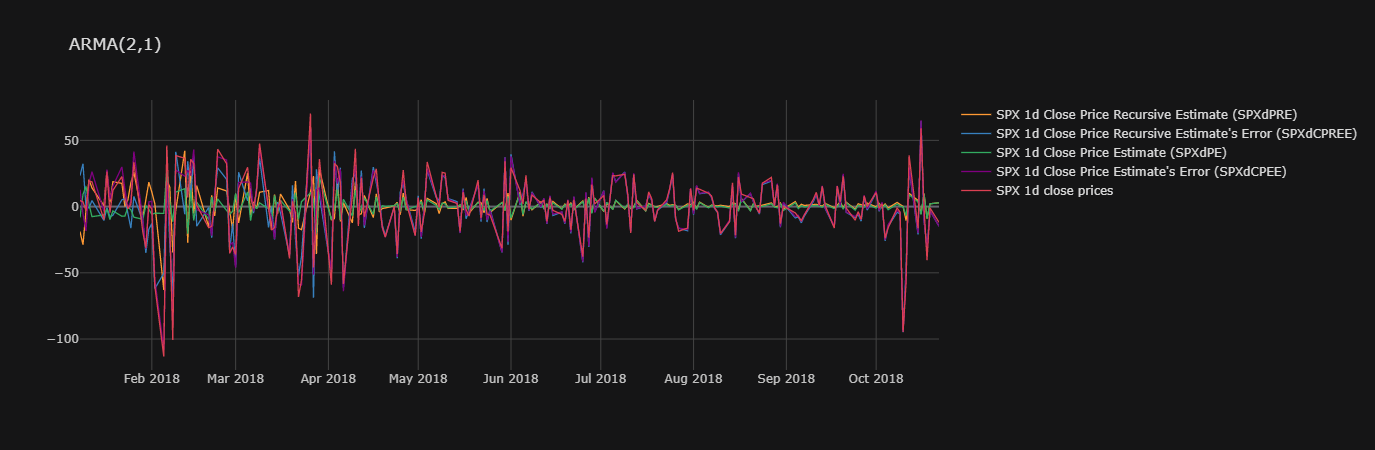

,SPX 1d Close Price Recursive Estimate (SPXdPRE),SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE),SPXdPRE - SPXdCPREE,SPX 1d Close Price Estimate (SPXdPE),SPX 1d Close Price Estimate's Error (SPXdCPEE),SPX 1d close prices Timestamp,SPX 1d close prices
2018-01-08T00:00:00Z,-18.880650,2.344065e+01,4.56,-8.121789,12.681789,2018-01-08T00:00:00Z,4.56
2018-01-09T00:00:00Z,-28.750632,3.233063e+01,3.58,9.196967,-5.616967,2018-01-09T00:00:00Z,3.58
2018-01-10T00:00:00Z,-3.060000,-4.973799e-14,-3.06,15.262632,-18.322632,2018-01-10T00:00:00Z,-3.06
2018-01-11T00:00:00Z,20.363122,-1.033122e+00,19.33,1.823871,17.506129,2018-01-11T00:00:00Z,19.33
2018-01-12T00:00:00Z,14.152048,4.527952e+00,18.68,-7.596277,26.276277,2018-01-12T00:00:00Z,18.68
...,...,...,...,...,...,...,...
2018-10-16T00:00:00Z,-5.404896,6.453490e+01,59.13,-5.982395,65.112395,2018-10-16T00:00:00Z,59.13
2018-10-17T00:00:00Z,9.675247,-1.038525e+01,-0.71,9.788073,-10.498073,2018-10-17T00:00:00Z,-0.71
2018-10-18T00:00:00Z,-9.035374,-3.139463e+01,-40.43,-8.846948,-31.583052,2018-10-18T00:00:00Z,-40.43
2018-10-19T00:00:00Z,2.139711,-3.139711e+00,-1.00,2.064127,-3.064127,2018-10-19T00:00:00Z,-1.00


In [76]:
SPX_Y_hat_df[["SPX 1d Close Price Recursive Estimate (SPXdPRE)",
              "SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE)",
              "SPX 1d Close Price Estimate (SPXdPE)",
              "SPX 1d Close Price Estimate's Error (SPXdCPEE)",
              "SPX 1d close prices"]
             ].iplot(title = f"ARMA({p},{q})", theme = "solar")
SPX_Y_hat_df

In [77]:
SPX_FOC_Beta_hat_component

Matrix([
[  0.821332045111788],
[ -0.421155540544277],
[-0.0799433729437008],
[  0.504585818451687]])

### [Ex-Ante](https://www.investopedia.com/terms/e/exante.asp) Parameter Identification: Autocorrelation and Partial Autocorrelation Functions <a class="anchor" id="exanteparameteridentification"></a>

To figure out our parameter identification (*i.e.*: what lags to use in our model), we may want to plot [ACF](https://www.investopedia.com/terms/a/autocorrelation.asp) and [PACF](https://en.wikipedia.org/wiki/Partial_autocorrelation_function) diorgams:

In [78]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

N.B.: the [semicolon](https://github.com/statsmodels/statsmodels/issues/4155) at the end of the code for our plots bellow is there to avoid [duplicates](https://github.com/statsmodels/statsmodels/issues/1265).

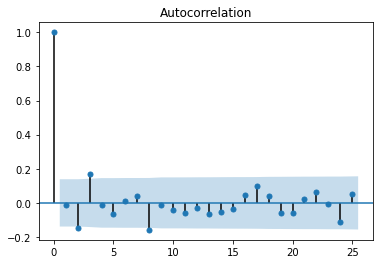

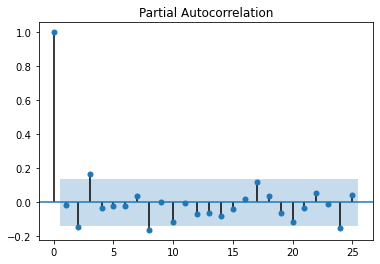

In [79]:
sm.graphics.tsa.plot_acf(x = SPX_Y_hat_df["SPX 1d close prices"], lags=25);
sm.graphics.tsa.plot_pacf(x = SPX_Y_hat_df["SPX 1d close prices"], lags=25);

The plots above suggest tha twe ought to use a singular AR(8) model - *i.e.*: an AR model with only an 8th lag, no 1st, 2nd, ... Note that the apparent dependence on the 24th lag emphasises how our variable autocorrelates with its 8th lag (since $8*3=24$); even though it is true to say that the lack of autocorrelation with its 16th lag is (week but still existing) evidence of the contrary. So now we have to change our function to allow for such single lags:

### Generalising: Step 2.2: coding for the ARMA model with arbitrary lags <a class="anchor" id="generalisingstep2p1codingforthearmamodelwithsingulararbitrarylags"></a>

In [89]:
p = [1, 3]
q = [1, 4]
c = True
m = max(p + q)  # This will get us the single max number in the two lists p and q.
SPX_X, SPX_Y, SPX_epsilon, SPX_FOC_Beta_hat, _SPX_epsilon, SPX_Y_hat, SPX_Y_hat_Timestamp = [], [], [], [], [], [], []

In [90]:
MA = 0
for a in range(7):
    print(f"\na: {a}")

    SPX_X_component = []

    if (a != 0) and (a in q): MA += 1
    print(f"A: {MA}")

    for f in range(m-max(p), m+a):
        print(f"f: {f}")

        F = [f+g for g in p][::-1]

        if MA == 0:
            SPX_X_component.append([SPX["1d Close Price"].iloc[h] for h in F])
        else:
            SPX_X_component.append([SPX["1d Close Price"].iloc[h] for h in F] +
                                   MA*[0])

        print(F)

    display(sympy.Matrix(SPX_X_component))


a: 0
A: 0
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]


Matrix([
[ 3.57999999999993, 19.1600000000003],
[-3.05999999999995, 4.55999999999995],
[ 19.3299999999999, 3.57999999999993]])


a: 1
A: 1
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0],
[-3.05999999999995,  4.55999999999995, 0],
[ 19.3299999999999,  3.57999999999993, 0],
[ 18.6799999999998, -3.05999999999995, 0]])


a: 2
A: 1
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]
f: 5
[8, 6]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0],
[-3.05999999999995,  4.55999999999995, 0],
[ 19.3299999999999,  3.57999999999993, 0],
[ 18.6799999999998, -3.05999999999995, 0],
[-9.81999999999971,  19.3299999999999, 0]])


a: 3
A: 1
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]
f: 5
[8, 6]
f: 6
[9, 7]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0],
[-3.05999999999995,  4.55999999999995, 0],
[ 19.3299999999999,  3.57999999999993, 0],
[ 18.6799999999998, -3.05999999999995, 0],
[-9.81999999999971,  19.3299999999999, 0],
[ 26.1399999999999,  18.6799999999998, 0]])


a: 4
A: 2
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]
f: 5
[8, 6]
f: 6
[9, 7]
f: 7
[10, 8]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0, 0],
[-3.05999999999995,  4.55999999999995, 0, 0],
[ 19.3299999999999,  3.57999999999993, 0, 0],
[ 18.6799999999998, -3.05999999999995, 0, 0],
[-9.81999999999971,  19.3299999999999, 0, 0],
[ 26.1399999999999,  18.6799999999998, 0, 0],
[-4.52999999999975, -9.81999999999971, 0, 0]])


a: 5
A: 2
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]
f: 5
[8, 6]
f: 6
[9, 7]
f: 7
[10, 8]
f: 8
[11, 9]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0, 0],
[-3.05999999999995,  4.55999999999995, 0, 0],
[ 19.3299999999999,  3.57999999999993, 0, 0],
[ 18.6799999999998, -3.05999999999995, 0, 0],
[-9.81999999999971,  19.3299999999999, 0, 0],
[ 26.1399999999999,  18.6799999999998, 0, 0],
[-4.52999999999975, -9.81999999999971, 0, 0],
[            12.27,  26.1399999999999, 0, 0]])


a: 6
A: 2
f: 1
[4, 2]
f: 2
[5, 3]
f: 3
[6, 4]
f: 4
[7, 5]
f: 5
[8, 6]
f: 6
[9, 7]
f: 7
[10, 8]
f: 8
[11, 9]
f: 9
[12, 10]


Matrix([
[ 3.57999999999993,  19.1600000000003, 0, 0],
[-3.05999999999995,  4.55999999999995, 0, 0],
[ 19.3299999999999,  3.57999999999993, 0, 0],
[ 18.6799999999998, -3.05999999999995, 0, 0],
[-9.81999999999971,  19.3299999999999, 0, 0],
[ 26.1399999999999,  18.6799999999998, 0, 0],
[-4.52999999999975, -9.81999999999971, 0, 0],
[            12.27,  26.1399999999999, 0, 0],
[ 22.6699999999996, -4.52999999999975, 0, 0]])

In [92]:
def rotate_0(l, n):
    """
    Merits to: https://stackoverflow.com/questions/2150108/efficient-way-to-rotate-a-list-in-python.
    To test this function try:
    >>> test_l = [1,3,9,11,16,19, 21, 23, 24, 25, 26, 29]
    >>> print(rotate_0(test_l, 3))
    >>> print(rotate_0(test_l, -3))
    """
    return [0]*len(l[n:]) + l[:n]

In [93]:
def rotate(l, n):
    """
    Merits to: https://stackoverflow.com/questions/2150108/efficient-way-to-rotate-a-list-in-python.
    To test this function try:
    >>> test_l = [1,3,9,11,16,19, 21, 23, 24, 25, 26, 29]
    >>> print(rotate(test_l, 3))
    >>> print(rotate(test_l, -3))
    """
    return l[n:] + l[:n]

In [102]:
test_l = [1,3,9,11,16,19, 21, 23, 24, 25, 26, 29]
print(rotate_0(test_l, 3))
print(rotate_0(test_l, -3))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 9]
[0, 0, 0, 1, 3, 9, 11, 16, 19, 21, 23, 24]


In [123]:
SPX_FOC_Beta_hat_component = False

In [108]:
p = [8]
q = [5, 11]
c = False
SPX_X, SPX_Y, SPX_epsilon = [], [], []
SPX_FOC_Beta_hat, _SPX_epsilon = [], []
SPX_Y_hat, SPX_Y_hat_Timestamp = [], []

if c is True: C = 1
else: C = 0

m = max(p + q)  # This will get us the single max number in the two lists p and q.
print(f"p: {p}\nq: {q}\nm: {m}")

# I don't know why, but the code doesn't work without the bellow if statement... If someone could figure it out please tell me...
if max(p) >= max(q) or c is False: rotate_f = rotate
else: rotate_f = rotate_0

MA = 0  # Count of the Moving Average components
for a in range(200):

#     if a < 6 or a % 100 == 0: print(f"\n{a}")
#     print(f"\na = {a}")
#     print(f"SPX_Y_component: {[b for b in [m+d for d in range(a+max(p))]]}")

    # 1st: Set up the Y matrix:
    SPX_Y_component = [SPX["1d Close Price"].iloc[b]
                       for b in [m+d for d in range(a+max(p))]]
    SPX_Y_hat_component_Timestamp = SPX["Timestamp"].iloc[m+a+max(p)-1]  # This time, we need the max number in the list ' p '.

#     print("SPX_Y_component1 : ")
#     display(sympy.Matrix(SPX_Y_component))

    # 2nd: Setup the AR component of our X matrix used in the FOC equation:
    SPX_X_component = []
    if (a != 0) and (a in q): MA += 1  # This time, we only want to include a MA component once we hit a nessesary lag.
    # if (a in q) and (q != [0]): MA += 1  # This was in the original code, but it could be wrong

    for f in range(m-max(p), m+a):

        F = [max(p) + f - i for i in p]  # If, for e.g.: p = [1,4,5], then F1 would be [4, 1, 0].
#         print(F)
#         if MA == 1:
#             print(MA)
#             print(_SPX_epsilon[-1][-a])

        # If the previous ' SPX_epsilon_component ' computed was 0, this could cause problems that we need to take into account:
        # if ' _SPX_epsilon[-1][-q[MA]] ' when MA is 1 - which is to say ' _SPX_epsilon[-1][-a] ' is 0, that will lead to a column of 0 and a rant issue.
#         if MA == 0 or (a != 0 and a in q and _SPX_epsilon[-1][-a] == 0):

#         _SPX_epsilon[-1][-q[MA-1]] == 0

        if MA == 0:
            SPX_X_component.append([SPX["1d Close Price"].iloc[h] for h in F])
        else:
            SPX_X_component.append([SPX["1d Close Price"].iloc[h] for h in F] + MA*[0])

        if c is True:
            SPX_X_component[f-m+max(p)] = [1] + SPX_X_component[f-m+max(p)]  # The ' -m+max(p) ' is just there to normalise the index of our list; note that ' f-m+p ' has to start at 0.

    if a < 6 or a % 100 == 0:
        print("SPX_X_component1 : ")
        display(sympy.Matrix(SPX_X_component))

    if a == 0:  # Applying the assumption of eplsilons being 0s to start with:
        _SPX_epsilon = [[0]*j for j in range(1, max(p)+1)]
    elif a > 0:
#         print("SPX_epsilon :")
#         display(SPX_epsilon)

#         _SPX_epsilon.append([0]*max(p) + SPX_epsilon[::-1][0:min(max(q),a+1)])
        _SPX_epsilon.append([0]*max(p) + SPX_epsilon)

#         print(f"_SPX_epsilon: {_SPX_epsilon}")

        for col in range(len(p)+C, len(SPX_X_component[0])):
            if a < 6 or a % 100 == 0:
                print(f"____\nepsilon used: {_SPX_epsilon[-1]}\n" + 
                      f"removing 1: {-(q[col-(len(p)+C)]-1)}\n" + 
                      f"result1: {rotate_f(_SPX_epsilon[-1], -(q[col-(len(p)+C)]-1))}\n" + 
                      f"~~~~~~~~~~from {max(q)-1} to {len(SPX_X_component)}")
            for row in range(max(q)-1, len(SPX_X_component)+1):  # The ' 1 ' is here becasue the list is 0 indexed
                if a < 6 or a % 100 == 0: print(f"#################row, col: {row}, {col}")
                try:
                    if SPX_X_component[row][col] == 0:  # This is a safety component - I don't want to remove acurate values.
                        SPX_X_component[row][col] = rotate_f(
                            _SPX_epsilon[-1], -(q[col-(len(p)+C)]-1))[row]  # The ' -(len(p)+C) ' is just there to normalise the index of our list; note that ' col-(len(p)+C) ' has to start at 0.
                        # If someone could figure out and tell me why it only works with ' +C '
                        # here while it needed to be ' -C ' above... I'd like to know.
                except:
                    pass


#         print("SPX_X_component2 : ")
#         display(sympy.Matrix(SPX_X_component))

    # The last column could be filled with 0s for many reasons (e.g.: 
    # the 1st epsilon happens to be 0), we thus have to take that  
    # into account since it would otherwise cause a rank issue:
    for roll in range(len(SPX_X_component[0])):  # We want to go through the folloing if loop as many times as there are columns in ' SPX_X_component ':
        if all(v[-1] == 0 for v in SPX_X_component):  # If all the last values of each list in ' SPX_X_component ' are 0:
            SPX_X_component = [v[:-1] for v in SPX_X_component]  # The remove these last values.

#     print("_SPX_epsilon :")
#     display(_SPX_epsilon)

    if a < 6 or a % 100 == 0:
        if a > 0: print(f"SPX_epsilon: {SPX_epsilon}")
        print(f"row and col changed: {row}, {col}")
        print("SPX_X_component3 : ")
        display(sympy.Matrix(SPX_X_component))

    SPX_newX_component = SPX_X_component[-1]
    SPX_X_component_M = sympy.Matrix(SPX_X_component)

    # If p = 1, we have to use our scalar method for the following 2 steps:
    if max(p) == 1 and a == 0:
        if c is True:
#             print(m+p+a-1)
#             print(m+p+a-2)
            SPX_FOC_Beta_hat_component = [0,
                                          SPX["1d Close Price"].iloc[m+a] /  # Note that ' m+a ' should be ' m+max(p)+a-1 ' but max(p) = 1.
                                          SPX["1d Close Price"].iloc[m+a-1]]  # Note that ' m+a-1 ' should be ' m+max(p)+a-2 ' but max(p) = 1.
        SPX_epsilon_component = 0
        SPX_Y_hat_component = SPX["1d Close Price"].iloc[m+a]  # Note that ' m+a ' should be ' m+max(p)+a-1 ' but max(p) = 1.

    else:
        if max(p) == 1 and a == 1:
            SPX_FOC_Beta_hat_component = [phi_1_equation.subs(y1, SPX["1d Close Price"].iloc[m-1] # Here, 1 is max(p).
                                                              ).subs(y2, SPX["1d Close Price"].iloc[m] # again, ' m ' should be ' m-max(p)+1 '.
                                                                    ).subs(y3, SPX["1d Close Price"].iloc[m+1])] # And ' m-p+2 ' as ' m+1 '.
            if c is True:
                SPX_FOC_Beta_hat_component = [c_hat_equation.subs(y1, SPX["1d Close Price"].iloc[m-1] # And again.
                                                                  ).subs(y2, SPX["1d Close Price"].iloc[m] # And again.
                                                                        ).subs(y3, SPX["1d Close Price"].iloc[m+1] # And again.
                                                                              )] + SPX_FOC_Beta_hat_component
            SPX_FOC_Beta_hat_component = sympy.Matrix(SPX_FOC_Beta_hat_component)

#             print("SPX_newX_component 0: ")
#             display(SPX_newX_component)

            if (max(q) > 0) and len(SPX_newX_component) > 1:
#                 print("#################")
                SPX_newX_component = SPX_newX_component[:-1]  # We need to ignore the previous MA part since epsilon was 0 then

#             print("SPX_newX_component 1: ")
#             display(SPX_newX_component)

        elif max(p) == 1 and max(q) > 0 and a <= max(q):  # We need to ignore the previous MA part since epsilon was 0 then:
            _SPX_X_component_M = SPX_X_component_M
            _SPX_X_component_M.col_del(-1)  # We are deleting this column as we are looking at an extra case where epsilon = 0.
            SPX_FOC_Beta_hat_component = (
                ((_SPX_X_component_M.T * _SPX_X_component_M)**(-1)) *
                _SPX_X_component_M.T * sympy.Matrix(SPX_Y_component))
            SPX_newX_component = SPX_newX_component[:-1]
        else:
            SPX_FOC_Beta_hat_component = (
                ((SPX_X_component_M.T * SPX_X_component_M)**(-1)) *
                SPX_X_component_M.T * sympy.Matrix(SPX_Y_component))

#         print("SPX_newX_component 2: ")
#         display(SPX_newX_component)
#         print("SPX_FOC_Beta_hat_component: ")
#         display(SPX_FOC_Beta_hat_component)

#         display((sympy.Matrix(SPX_newX_component).T * SPX_FOC_Beta_hat_component)[0])

        SPX_Y_hat_component = (sympy.Matrix(SPX_newX_component).T * SPX_FOC_Beta_hat_component)[0]
        SPX_epsilon_component = SPX["1d Close Price"].iloc[m+max(p)+a-1] - SPX_Y_hat_component

#         print(f"SPX['1d Close Price'].iloc[m+max(p)+a-1]: {SPX['1d Close Price'].iloc[m+max(p)+a-1]}")
#         print(f"SPX_Y_hat_component: {SPX_Y_hat_component}")
#         print(f"SPX_epsilon_component: {SPX_epsilon_component}")

#         print("SPX_FOC_Beta_hat_component")
#         display(SPX_FOC_Beta_hat_component)

#     if a > 1:
#         print("SPX_Y_hat : ")
#         display(SPX_Y_hat)

#         print("SPX_close_prices['Close Price'].iloc[m+p+a-1]")
#         display(SPX["1d Close Price"].iloc[m+p+a-1])

    SPX_X.append(SPX_X_component)
    SPX_Y.append(SPX_Y_component)
    SPX_FOC_Beta_hat.append(SPX_FOC_Beta_hat_component)
    SPX_epsilon.append(SPX_epsilon_component)
    SPX_Y_hat_Timestamp.append(SPX_Y_hat_component_Timestamp)
    SPX_Y_hat.append(SPX_Y_hat_component)

# Our method above recursively computed elements, but now that we've trained our model up to max(a), we can use our elements to compute our non-recursive estimates:
non_recursive_SPX_Y_hat = (SPX_X_component_M * SPX_FOC_Beta_hat_component)[-len(SPX_Y_hat):] # both elements on the right-hand-side are the latest in our loop through ' a ' above. The ' -len(SPX_Y_hat) ' gets us the last x elements, where x = len(SPX_Y_hat)

SPX_Y_hat_df = pd.DataFrame(
    index=SPX_Y_hat_Timestamp,
    data={
        "SPX 1d Close Price Recursive Estimate (SPXdPRE)": [
            float(i) for i in SPX_Y_hat],  # This 'float' business is needed here to convert our data in a way that pyplot "enjoys".
        "SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE)": [
            float(i) for i in SPX_epsilon],
        "SPXdPRE - SPXdCPREE": [
            float(SPX_Y_hat[k] + SPX_epsilon[k]) for k in range(len(SPX_Y_hat))],
        "SPX 1d Close Price Estimate (SPXdPE)": [
            float(i) for i in non_recursive_SPX_Y_hat],
        "SPX 1d Close Price Estimate's Error (SPXdCPEE)": [
            float(i) - float(j) for i, j in zip(
                (SPX["1d Close Price"].iloc[
                    m+max(p)-1: m+max(p)-1+len(SPX_Y_hat)]),
                non_recursive_SPX_Y_hat)],
        "SPX 1d close prices Timestamp": list(
            SPX["Timestamp"].iloc[
                m+max(p)-1: m+max(p)-1+len(SPX_Y_hat)]),
        "SPX 1d close prices": [
            float(i) for i in SPX["1d Close Price"].iloc[
                m+max(p)-1: m+max(p)-1+len(SPX_Y_hat)]]})

p: [8]
q: [5, 11]
m: 11
row and col changed: 207, 2
SPX_X_component3 : 


Matrix([
[ 4.55999999999995],
[ 3.57999999999993],
[-3.05999999999995],
[ 19.3299999999999],
[ 18.6799999999998],
[-9.81999999999971],
[ 26.1399999999999],
[-4.52999999999975]])

SPX_epsilon: [-32.7645049577291]
row and col changed: 207, 2
SPX_X_component3 : 


Matrix([
[ 4.55999999999995],
[ 3.57999999999993],
[-3.05999999999995],
[ 19.3299999999999],
[ 18.6799999999998],
[-9.81999999999971],
[ 26.1399999999999],
[-4.52999999999975],
[            12.27]])

SPX_epsilon: [-32.7645049577291, 5.37197939407854]
row and col changed: 207, 2
SPX_X_component3 : 


Matrix([
[ 4.55999999999995],
[ 3.57999999999993],
[-3.05999999999995],
[ 19.3299999999999],
[ 18.6799999999998],
[-9.81999999999971],
[ 26.1399999999999],
[-4.52999999999975],
[            12.27],
[ 22.6699999999996]])

SPX_epsilon: [-32.7645049577291, 5.37197939407854, 4.26769745463790]
row and col changed: 207, 2
SPX_X_component3 : 


Matrix([
[ 4.55999999999995],
[ 3.57999999999993],
[-3.05999999999995],
[ 19.3299999999999],
[ 18.6799999999998],
[-9.81999999999971],
[ 26.1399999999999],
[-4.52999999999975],
[            12.27],
[ 22.6699999999996],
[ 6.16000000000031]])

SPX_epsilon: [-32.7645049577291, 5.37197939407854, 4.26769745463790, -57.2195890232676]
row and col changed: 207, 2
SPX_X_component3 : 


Matrix([
[ 4.55999999999995],
[ 3.57999999999993],
[-3.05999999999995],
[ 19.3299999999999],
[ 18.6799999999998],
[-9.81999999999971],
[ 26.1399999999999],
[-4.52999999999975],
[            12.27],
[ 22.6699999999996],
[ 6.16000000000031],
[-1.59000000000015]])

____
epsilon used: [0, 0, 0, 0, 0, 0, 0, 0, -32.7645049577291, 5.37197939407854, 4.26769745463790, -57.2195890232676, -113.742180765469]
removing 1: -4
result1: [5.37197939407854, 4.26769745463790, -57.2195890232676, -113.742180765469, 0, 0, 0, 0, 0, 0, 0, 0, -32.7645049577291]
~~~~~~~~~~from 10 to 13
#################row, col: 10, 1
#################row, col: 11, 1
#################row, col: 12, 1
#################row, col: 13, 1
SPX_epsilon: [-32.7645049577291, 5.37197939407854, 4.26769745463790, -57.2195890232676, -113.742180765469]
row and col changed: 13, 1
SPX_X_component3 : 


Matrix([
[ 4.55999999999995,                 0],
[ 3.57999999999993,                 0],
[-3.05999999999995,                 0],
[ 19.3299999999999,                 0],
[ 18.6799999999998,                 0],
[-9.81999999999971,                 0],
[ 26.1399999999999,                 0],
[-4.52999999999975,                 0],
[            12.27,                 0],
[ 22.6699999999996,                 0],
[ 6.16000000000031,                 0],
[-1.59000000000015,                 0],
[ 1.71000000000004, -32.7645049577291]])

____
epsilon used: [0, 0, 0, 0, 0, 0, 0, 0, -32.7645049577291, 5.37197939407854, 4.26769745463790, -57.2195890232676, -113.742180765469, 0, 3.82774927467133, -88.5446309234711, -13.9456148390658, -19.6394038540804, 7.10993691772177, 2.84217094304040e-14, 1.52726501756219, -2.64804436586726, -20.9687124319684, -3.07751366617343, 4.84282667704837, 43.1546623169091, 21.8739885251363, -44.1234781759014, -29.8695847236034, -34.3705232266455, 26.5979547027388, 34.6628660239769, -4.90738908464483, -4.28063071289189, 5.57122741776219, 48.2602038732881, -2.62928701767192, -24.0331077836024, -12.3951933109389, 4.47235338875509, 16.7972079943901, -39.8054104504590, 0.403020090045030, -2.04371661460419, -67.6384766261456, -52.9514811184405, 53.1633400102015, -45.8429265280207, -5.70082575154490, 11.1282533515723, -70.6684246396861, 39.6265697395687, 13.8394162874029, 7.53546180339229, -40.4747646155462, -6.53008907864642, 49.8822163981942, -6.81104410324540, 10.5096546478431, -5.02553225504679, 27

Matrix([
[  4.55999999999995,                   0,                   0],
[  3.57999999999993,                   0,                   0],
[ -3.05999999999995,                   0,                   0],
[  19.3299999999999,                   0,                   0],
[  18.6799999999998,                   0,                   0],
[ -9.81999999999971,                   0,                   0],
[  26.1399999999999,                   0,                   0],
[ -4.52999999999975,                   0,                   0],
[             12.27,                   0,                   0],
[  22.6699999999996,                   0,                   0],
[  6.16000000000031,                   0,                   0],
[ -1.59000000000015,                   0,                   0],
[  1.71000000000004,   -32.7645049577291,                   0],
[  33.6199999999999,    5.37197939407854,                   0],
[ -19.3399999999997,     4.2676974546379,                   0],
[ -31.1000000000004,   -57.2195

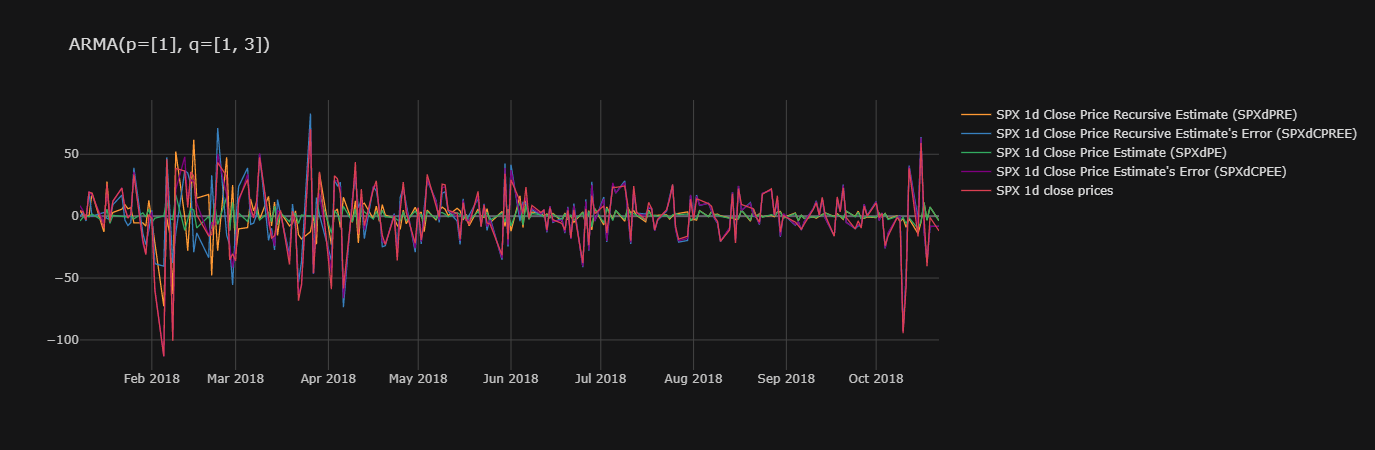

,SPX 1d Close Price Recursive Estimate (SPXdPRE),SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE),SPXdPRE - SPXdCPREE,SPX 1d Close Price Estimate (SPXdPE),SPX 1d Close Price Estimate's Error (SPXdCPEE),SPX 1d close prices Timestamp,SPX 1d close prices
2018-01-08T00:00:00Z,4.560000,0.000000e+00,4.56,-3.922298,8.482298,2018-01-08T00:00:00Z,4.56
2018-01-09T00:00:00Z,0.895238,2.684762e+00,3.58,-0.933491,4.513491,2018-01-09T00:00:00Z,3.58
2018-01-10T00:00:00Z,0.828537,-3.888537e+00,-3.06,-0.004028,-3.055972,2018-01-10T00:00:00Z,-3.06
2018-01-11T00:00:00Z,-0.250646,1.958065e+01,19.33,-0.429217,19.759217,2018-01-11T00:00:00Z,19.33
2018-01-12T00:00:00Z,18.680000,-2.842171e-14,18.68,1.744712,16.935288,2018-01-12T00:00:00Z,18.68
...,...,...,...,...,...,...,...
2018-10-16T00:00:00Z,-4.845221,6.397522e+01,59.13,-4.199603,63.329603,2018-10-16T00:00:00Z,59.13
2018-10-17T00:00:00Z,10.835448,-1.154545e+01,-0.71,11.150780,-11.860780,2018-10-17T00:00:00Z,-0.71
2018-10-18T00:00:00Z,-3.270803,-3.715920e+01,-40.43,-3.310753,-37.119247,2018-10-18T00:00:00Z,-40.43
2018-10-19T00:00:00Z,7.354526,-8.354526e+00,-1.00,7.390726,-8.390726,2018-10-19T00:00:00Z,-1.00


In [233]:
SPX_Y_hat_df[["SPX 1d Close Price Recursive Estimate (SPXdPRE)",
              "SPX 1d Close Price Recursive Estimate's Error (SPXdCPREE)",
              "SPX 1d Close Price Estimate (SPXdPE)",
              "SPX 1d Close Price Estimate's Error (SPXdCPEE)",
              "SPX 1d close prices"]
             ].iplot(title = f"ARMA(p={p}, q={q})", theme = "solar")
SPX_Y_hat_df

In [188]:
SPX.head(10)

,index,Instrument,Timestamp,Close Price,1d Close Price
0,2,.SPX,2018-01-03T00:00:00Z,2713.06,17.25
1,3,.SPX,2018-01-04T00:00:00Z,2723.99,10.93
2,4,.SPX,2018-01-05T00:00:00Z,2743.15,19.16
3,5,.SPX,2018-01-08T00:00:00Z,2747.71,4.56
4,6,.SPX,2018-01-09T00:00:00Z,2751.29,3.58
5,7,.SPX,2018-01-10T00:00:00Z,2748.23,-3.06
6,8,.SPX,2018-01-11T00:00:00Z,2767.56,19.33
7,9,.SPX,2018-01-12T00:00:00Z,2786.24,18.68
8,10,.SPX,2018-01-16T00:00:00Z,2776.42,-9.82
9,11,.SPX,2018-01-17T00:00:00Z,2802.56,26.14


In [208]:
test = [[19.16000000000031, 0, 0], [4.559999999999945, 0, 0], [3.5799999999999272, 2.68476215321216, 0], [-3.0599999999999454, -3.88853716700813, 0]]

In [209]:
if all(v[-1] == 0 for v in test):
    test = [v[:-1] for v in test]

test

[[19.16000000000031, 0],
 [4.559999999999945, 0],
 [3.5799999999999272, 2.68476215321216],
 [-3.0599999999999454, -3.88853716700813]]